# Code for Correlations of State of the Academy 2022
---
**Description**: This notebook contains the code used to find correlations in the SOTA 2022. The code is documented and shared to ensure full transparency of the process data is engineered and filtered. All relevant data and information is removed to ensure complete privacy of survey respondents.

**Author**: Chang Dakota Sum Kiu (schang23@andover.edu, dakotacsk@protonmail.com)

**Editors**: Raina Yang (ryang24@andover.edu)

**Last Edited**: 17-05-2022

# Code for Correlations of State of The Academy 2022

In [1]:
{
    "tags": [
        "hide_input",
    ]
}

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

In [2]:
df = pd.read_csv('/Users/dcoder/Downloads/CSV/State of the Academy 2022.csv') # your file path

FileNotFoundError: [Errno 2] No such file or directory: '/Users/dcoder/Downloads/CSV/State of the Academy 2022.csv'

In [4]:
df.drop(['Respondent ID', 'Collector ID', 'Start Date', 'End Date', 'IP Address', 'Email Address', 'First Name', 'Last Name', 'Custom Data 1'], axis=1, inplace=True)

In [5]:
df = df.drop(0)

In [6]:
pd.options.plotting.backend = "plotly"
pio.templates.default = "plotly_dark"

# Use this to find specific questions from survey (search)

In [7]:
columns = df.columns
for i in columns:
    if 'race' in i: # put your word in here
        print(i)

What is your race? Check all that apply.


In [8]:
df['What is your race? Check all that apply.'].unique()

array([nan, 'Asian'], dtype=object)

In [9]:
df['How many hours do you spend on coursework outside of class each day?'].unique()

array(['3 hours', '8 hours', nan, '4 hours', '5 hours', '2 hours',
       '6 hours', '10 hours or more', '1 hour or less', '7 hours',
       '9 hours'], dtype=object)

# Separating df by commonly used classifications

---

temp = df['#######']
for each in temp:
    print('df_' +each+ "= df[df['#######'] =='" + each + "']")

## By class

In [10]:
df_2022 = df[df['What class are you in?']=='2022']
df_2023 = df[df['What class are you in?']=='2023']
df_2024 = df[df['What class are you in?']=='2024']
df_2025 = df[df['What class are you in?']=='2025']

df_2022.reset_index(inplace=True)
df_2022.drop('index', axis=1, inplace=True)
df_2023.reset_index(inplace=True)
df_2023.drop('index', axis=1, inplace=True)
df_2024.reset_index(inplace=True)
df_2024.drop('index', axis=1, inplace=True)
df_2025.reset_index(inplace=True)
df_2025.drop('index', axis=1, inplace=True)

/Users/dcoder/miniconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## By day or boarding

In [11]:
df_day = df[df['What are you enrolled as?']=='Boarding student']
df_boarding = df[df['What are you enrolled as?']=='Day student']

## By sec

In [12]:
df_unsure = df[df['What is your net family income?']=='Unsure']
df_0 = df[df['What is your net family income?']=='$34,999 or less']
df_35 = df[df['What is your net family income?']=='$35,000 to $59,999']
df_60 = df[df['What is your net family income?']=='$60,000 to $99,999']
df_100 = df[df['What is your net family income?']=='$100,000 to $149,999']
df_150 = df[df['What is your net family income?']=='$150,000 to $249,999']
df_250 = df[df['What is your net family income?']=='$250,000 to $499,999']
df_500 = df[df['What is your net family income?']=='$500,000 or more']

## International

In [13]:
df_notinternational = df[df['If you are an international student, what continent are you from?']=='Not applicable, I live in the U.S.']
df_international = df[df['If you are an international student, what continent are you from?']!='Not applicable, I live in the U.S.']

## By gender identity

In [14]:
df_Response = df[df['What is your gender identity?'] =='Response']
df_Man = df[df['What is your gender identity?'] =='Man']
df_Woman = df[df['What is your gender identity?'] =='Woman']
df_Nonbinary = df[df['What is your gender identity?'] =='Nonbinary']
df_Agender = df[df['What is your gender identity?'] =='Agender']
df_Genderqueer = df[df['What is your gender identity?'] =='Genderqueer']
df_Other = df[df['What is your gender identity?'] =='Other (please specify)']
df_Questioning = df[df['What is your gender identity?'] =='Questioning']
df_Genderfluid = df[df['What is your gender identity?'] =='Genderfluid']
df_nan = df[df['What is your gender identity?'] =='nan']

## Community Type

In [15]:
df_urban = df[df['What type of community do you currently live in?']=='Urban']
df_suburban = df[df['What type of community do you currently live in?']=='Suburban']
df_rural = df[df['What type of community do you currently live in?']=='Rural']

## Legacy

In [16]:
df_legacy = df[df['Did any of your parent(s) or guardian(s) attend Andover?']!='No']
df_nolegacy = df[df['Did any of your parent(s) or guardian(s) attend Andover?']=='No']

## Political Affiliation

In [17]:
temp = df['What is your political affiliation?'].unique()
for each in temp:
#     print('df_' + str(each)+ " = df[df['What is your political affiliation?'] =='" + str(each) + "']")
    print('df_' + str(each))

df_Libertarian
df_Unsure
df_Liberal
df_Socialist
df_Independent
df_nan
df_Conservative
df_Other (please specify)
df_Communist


In [18]:
df_Response = df[df['What is your political affiliation?'] =='Response']
df_Unsure = df[df['What is your political affiliation?'] =='Unsure']
df_Liberal = df[df['What is your political affiliation?'] =='Liberal']
df_Independent = df[df['What is your political affiliation?'] =='Independent']
df_Socialist = df[df['What is your political affiliation?'] =='Socialist']
df_Libertarian = df[df['What is your political affiliation?'] =='Libertarian']
df_Conservative = df[df['What is your political affiliation?'] =='Conservative']
df_Communist = df[df['What is your political affiliation?'] =='Communist']
df_Other = df[df['What is your political affiliation?'] =='Other (please specify)']
df_nan = df[df['What is your political affiliation?'] =='nan']

## Varsity Athlete

In [19]:
df_varsity = df[df['Are you a varsity athlete?'] =='Yes']
df_novarsity = df[df['Are you a varsity athlete?'] =='No']

## Changed political affiliation

In [20]:
df_nochange = df[df['Have your political beliefs changed in the past year?'] =='No, they have stayed the same']
df_changeleft = df[df['Have your political beliefs changed in the past year?'] =='Yes, to the left']
df_changeright = df[df['Have your political beliefs changed in the past year?'] =='Yes, to the right']

## Informed about Politics

In [21]:
temp = df['How informed do you believe you are about politics and/or current events?'].unique()
for each in temp:
    print('df_' + str(each)+ " = df[df['How informed do you believe you are about politics and/or current events?'] =='" + str(each) + "']")

df_Moderately informed = df[df['How informed do you believe you are about politics and/or current events?'] =='Moderately informed']
df_Slightly informed = df[df['How informed do you believe you are about politics and/or current events?'] =='Slightly informed']
df_Extremely informed = df[df['How informed do you believe you are about politics and/or current events?'] =='Extremely informed']
df_Very informed = df[df['How informed do you believe you are about politics and/or current events?'] =='Very informed']
df_nan = df[df['How informed do you believe you are about politics and/or current events?'] =='nan']
df_Not at all informed = df[df['How informed do you believe you are about politics and/or current events?'] =='Not at all informed']


In [22]:
df_ModeratelyInformed = df[df['How informed do you believe you are about politics and/or current events?'] =='Moderately informed']
df_VeryInformed = df[df['How informed do you believe you are about politics and/or current events?'] =='Very informed']
df_SlightlyInformed = df[df['How informed do you believe you are about politics and/or current events?'] =='Slightly informed']
df_NotInformed = df[df['How informed do you believe you are about politics and/or current events?'] =='Not at all informed']
df_ExtremelyInformed = df[df['How informed do you believe you are about politics and/or current events?'] =='Extremely informed']

## Know Someone Incarcerated?

In [23]:
df_noKnowIncarcerated = df[df['Do you personally know someone who has been incarcerated?']=='No']
df_KnowIncarcerated = df[df['Do you personally know someone who has been incarcerated?']=='Yes']

## Leadership?

In [24]:
df_leader = df[df['Are you currently a student leader (prefect, proctor, DSM, EBI senior, cluster or school co-president) at Andover?']=='Yes']
df_noleader = df[df['Are you currently a student leader (prefect, proctor, DSM, EBI senior, cluster or school co-president) at Andover?']=='No']

## Counselor

In [25]:
df_seencounselor = df[df['Have you ever been to the Sykes Wellness Center to see a counselor?']=='Yes']
df_notseencounselor = df[df['Have you ever been to the Sykes Wellness Center to see a counselor?']=='No']

## Hooked up?

In [26]:
df_hookup_yes = df[df['Have you ever “hooked up” with someone you were not in a committed relationship with?']=='Yes']
df_hookup_no = df[df['Have you ever “hooked up” with someone you were not in a committed relationship with?']=='No']

## Happy?

In [27]:
df_happy = df[df['Generally speaking, do you consider yourself happy at Andover?']=='Yes']
df_nohappy = df[df['Generally speaking, do you consider yourself happy at Andover?']=='No']

## Mental Health Diagnosis

In [28]:
df_mentallyill = df[df['Are you currently receiving treatment for any mental health diagnosis? (ie. therapy, medication, etc.)']=='Yes']
df_notofficiallymentallyill = df[df['Are you currently receiving treatment for any mental health diagnosis? (ie. therapy, medication, etc.)']=='No']

## Anxiety?

In [29]:
df_anxiety = df[df['Have you ever been diagnosed with anxiety?']=='Yes']

## Drug use

In [30]:
df_nodrug = df[df['How often do you consume recreational drugs or alcohol on campus?']=='Not applicable, I have never consumed recreational drugs or alcohol on campus']
df_drugOnceATerm = df[df['How often do you consume recreational drugs or alcohol on campus?']=='About once a term']
df_drugDaily = df[df['How often do you consume recreational drugs or alcohol on campus?']=='Daily']
df_drugWeekly = df[df['How often do you consume recreational drugs or alcohol on campus?']=='Weekly']
df_drugAboutOnceAMonth = df[df['How often do you consume recreational drugs or alcohol on campus?']=='About once a month']
df_drugSeveralTimesAWeek = df[df['How often do you consume recreational drugs or alcohol on campus?']=='Several times a week']

## Study Drug Use

In [31]:
df_yesstudydrug = df[df["Have you ever used pharmaceutical drugs in the hopes of enhancing academic performance (i.e. “study drugs”) during your time at Andover without a prescription?"]=='Yes']
df_nostudydrug = df[df["Have you ever used pharmaceutical drugs in the hopes of enhancing academic performance (i.e. “study drugs”) during your time at Andover without a prescription?"]=='No']

## Pressured to do Drugs

In [32]:
df_pressuredfordrugs = df[df["Have you ever felt pressured by peers to consume recreational drugs or alcohol on campus?"]=='Yes']
df_notpressuredfordrugs = df[df["Have you ever felt pressured by peers to consume recreational drugs or alcohol on campus?"]=='No']

## Has fake id

In [33]:
df_hasfakeid = df[df['Have you ever purchased, or do you own, a fake ID?']=='Yes']
df_nofakeid = df[df['Have you ever purchased, or do you own, a fake ID?']=='No']

## Has learning disability

In [34]:
df_haslearningdisability = df[df['Do you have a disability/disorder/impairment that affects your learning?']=='Yes']
df_nolearningdisability = df[df['Do you have a disability/disorder/impairment that affects your learning?']=='No']

# YAY I CLEANED THE MULTI-ANSWER DATA HERES HOW:

In [35]:
for i in df.columns:
    if "Unnamed" in i:
        print(f'df = df[df["{i}"] =='+ '"' + str(df[i].unique()[1]) + '"]')

df = df[df["Unnamed: 22"] =="Helicopter"]
df = df[df["Unnamed: 24"] =="nan"]
df = df[df["Unnamed: 25"] =="She/her/hers"]
df = df[df["Unnamed: 26"] =="They/them/theirs"]
df = df[df["Unnamed: 27"] =="Ze/hir/hirs"]
df = df[df["Unnamed: 28"] =="Unsure"]
df = df[df["Unnamed: 29"] =="Spavik"]
df = df[df["Unnamed: 31"] =="Bisexual – sexually attracted to more than one gender"]
df = df[df["Unnamed: 32"] =="Demisexual – sexually attracted only after developing an emotional connection"]
df = df[df["Unnamed: 33"] =="nan"]
df = df[df["Unnamed: 34"] =="Homosexual - sexually attracted to the same sex or gender"]
df = df[df["Unnamed: 35"] =="Pansexual - sexually attracted to others, regardless of sex or gender"]
df = df[df["Unnamed: 36"] =="Queer – an umbrella term used to describe a sexual orientation that does not conform to dominant societal norms"]
df = df[df["Unnamed: 37"] =="Questioning"]
df = df[df["Unnamed: 38"] =="Titties, Pussy"]
df = df[df["Unnamed: 40"] =="Biromantic – romantically attrac

In [36]:
# Gender
df_hehim = df[df['Unnamed: 24']=='He/him/his']
df_sheher = df[df['Unnamed: 25']=='She/her/hers']
df_nbs = df[df['Unnamed: 26']=='They/them/theirs']

# Sexuality
df_bi = df[df["Unnamed: 31"] =="Bisexual – sexually attracted to more than one gender"]
df_demi = df[df["Unnamed: 32"] =="Demisexual – sexually attracted only after developing an emotional connection"]
df_het = df[df["Unnamed: 33"] =="Heterosexual - sexually attracted to the opposite sex or gender"]
df_homo = df[df["Unnamed: 34"] =="Homosexual - sexually attracted to the same sex or gender"]
df_pan = df[df["Unnamed: 35"] =="Pansexual - sexually attracted to others, regardless of sex or gender"]
df_queer = df[df["Unnamed: 36"] =="Queer – an umbrella term used to describe a sexual orientation that does not conform to dominant societal norms"]
df_questioning = df[df["Unnamed: 37"] =="Questioning"]

array_of_sexualities_df = [
    df_bi,
    df_demi,
    df_het,
    df_homo,
    df_pan,
    df_queer,
    df_questioning,
]
array_of_sexualities_name = [
    'df_bi',
    'df_demi',
    'df_het',
    'df_homo',
    'df_pan',
    'df_queer',
    'df_questioning',
]

# Romantic
df_biro = df[df["Unnamed: 40"] =="Biromantic – romantically attracted to more than one gender"]
df_demiro = df[df["Unnamed: 41"] =="Demiromantic – romantically attracted only after developing an emotional connection"]
df_hetero = df[df["Unnamed: 42"] =="Heteroromantic – romantically attracted to the opposite sex or gender"]
df_homoro = df[df["Unnamed: 43"] =="Homoromantic – romantically attracted to the same sex or gender"]
df_panro = df[df["Unnamed: 44"] =="Panromantic – romantically attracted to others, regardless of sex or gender"]
df_queerro = df[df["Unnamed: 45"] =="Queer"]
df_questioningro = df[df["Unnamed: 46"] =="Questioning"]

# Ethnicity
df_black = df[df["Unnamed: 49"] =="Black"]
df_nhpi = df[df["Unnamed: 50"] =="Native Hawaiian or Pacific Islander"]
df_indigenous = df[df["Unnamed: 51"] =="Indigenous Peoples of the Americas"]
df_white = df[df["Unnamed: 52"] =="White"]
df_asianAmerican = df[df["Unnamed: 54"] =="Asian American"]
df_broadlyEuropean = df[df["Unnamed: 55"] =="Broadly European"]
df_eastAsian = df[df["Unnamed: 56"] =="East Asian"]
df_eastEuropean = df[df["Unnamed: 57"] =="East European"]
df_ethnicallyJewish = df[df["Unnamed: 58"] =="Ethnically Jewish"]
df_hispanic = df[df["Unnamed: 59"] =="Hispanic"]
df_latinx = df[df["Unnamed: 60"] =="Latinx"]
df_mediterranean = df[df["Unnamed: 61"] =="Mediterranean"]
df_middleEastern = df[df["Unnamed: 62"] =="Middle Eastern"]
df_nativeAmerican = df[df["Unnamed: 63"] =="Native American"]
df_northAfrican = df[df["Unnamed: 64"] =="North African"]
df_pacificIslander = df[df["Unnamed: 65"] =="Pacific Islander"]
df_scandinavian = df[df["Unnamed: 66"] =="Scandinavian"]
df_southAsian = df[df["Unnamed: 67"] =="South Asian"]
df_southEastAsian = df[df["Unnamed: 68"] =="Southeast Asian"]
df_subsaharanAfrican = df[df["Unnamed: 69"] =="Sub-Saharan African"]
df_westIndianCaribbean = df[df["Unnamed: 70"] =="West Indian/Caribbean"]
df_westEuropean = df[df["Unnamed: 71"] =="West European"]
df_other_race = df[df["Unnamed: 72"] =="Other"]

df_Asian = df[df['What is your race? Check all that apply.']=='Asian']
df_Black = df[df["Unnamed: 49"] =="Black"]
df_NHPI = df[df["Unnamed: 50"] =="Native Hawaiian or Pacific Islander"]
df_Indigenous = df[df["Unnamed: 51"] =="Indigenous Peoples of the Americas"]
df_White = df[df["Unnamed: 52"] == "White"]

array_of_races_df = [
    df_Asian,
    df_Black,
    df_NHPI,
    df_Indigenous,
    df_White
]

array_of_races_name = [
    'df_Asian',
    'df_Black',
    'df_NHPI',
    'df_Indigenous',
    'df_White'
]
# array_of_ethnicity_df = [
#         df_black,
#         df_nhpi,
#         df_indigenous,
#         df_white,
#         df_asianAmerican,
#         df_broadlyEuropean,
#         df_eastAsian,
#         df_eastEuropean,
#         df_ethnicallyJewish,
#         df_hispanic,
#         df_latinx,
#         df_mediterranean,
#         df_middleEastern,
#         df_nativeAmerican,
#         df_northAfrican,
#         df_pacificIslander,
#         df_scandinavian,
#         df_southAsian,
#         df_southEastAsian,
#         df_subsaharanAfrican,
#         df_westIndianCaribbean,
#         df_westEuropean,
#         df_other_race,
#     ]

# array_of_ethnicities_name = [
#         'df_black',
#         'df_nhpi',
#         'df_indigenous',
#         'df_white',
#         'df_asianAmerican',
#         'df_broadlyEuropean',
#         'df_eastAsian',
#         'df_eastEuropean',
#         'df_ethnicallyJewish',
#         'df_hispanic',
#         'df_latinx',
#         'df_mediterranean',
#         'df_middleEastern',
#         'df_nativeAmerican',
#         'df_northAfrican',
#         'df_pacificIslander',
#         'df_scandinavian',
#         'df_southAsian',
#         'df_southEastAsian',
#         'df_subsaharanAfrican',
#         'df_westIndianCaribbean',
#         'df_westEuropean',
#         'df_other_race',
#     ]

# religion
df_atheist = df[df["Unnamed: 74"] =="Atheism"]
df_buddhist = df[df["Unnamed: 75"] =="Buddhism"]
df_catholic = df[df["Unnamed: 76"] =="Catholicism"]
df_christian = df[df["Unnamed: 77"] =="Christianity"]
df_hindu = df[df["Unnamed: 78"] =="Hinduism"]
df_islam = df[df["Unnamed: 79"] =="Islam"]
df_judaist = df[df["Unnamed: 80"] =="Judaism"]
df_mormon = df[df["Unnamed: 81"] =="Mormonism"]
df_pagan = df[df["Unnamed: 82"] =="Paganism"]
df_protestant = df[df["Unnamed: 83"] =="Protestantism"]

# Faculty Diversity
df_facDivNo = df[df['Do you think the faculty is lacking in diversity? If so, check all facets that you think are lacking.']=='Not applicable (I think the faculty is diverse enough)']
df_facDivAbility = df[df["Unnamed: 297"] =="Ability/Disability"]
df_facDivEthnicity = df[df["Unnamed: 298"] =="Ethnicity"]
df_facDivGender = df[df["Unnamed: 299"] =="Gender"]
df_facDivNeuroDiv = df[df["Unnamed: 300"] =="Neurodivergence"]
df_facDivPolitics = df[df["Unnamed: 301"] =="Political belief"]
df_facDivRace = df[df["Unnamed: 302"] =="Race"]
df_facDivReligion = df[df["Unnamed: 303"] =="Religion"]
df_facDivSexualOrientation = df[df["Unnamed: 304"] =="Sexual orientation"]
df_facDivSEC = df[df["Unnamed: 305"] =="Socioeconomic status"]
df_facDivOther = df[df["Unnamed: 306"] =="Other (please specify)"]

# Social Divide
df_socialDivideNo = df[df['Do you feel like there is a social divide at Andover between students of different __________? Check all that apply.']=='Not applicable (There are no social divides at Andover)']
df_socialDivideAbility = df[df["Unnamed: 314"] =="Ability/Disability"]
df_socialDivideEthnicity = df[df["Unnamed: 315"] =="Ethnicity"]
df_socialDivideGender = df[df["Unnamed: 316"] =="Gender"]
df_socialDivideNeuroDiv = df[df["Unnamed: 317"] =="Neurodiversities"]
df_socialDividePolitics = df[df["Unnamed: 318"] =="Political belief"]
df_socialDivideRace = df[df["Unnamed: 319"] =="Race"]
df_socialDivideReligion = df[df["Unnamed: 320"] =="Religion"]
df_socialDivideSexualOrientation = df[df["Unnamed: 321"] =="Sexual orientation"]
df_socialDivideSEC = df[df["Unnamed: 322"] =="Socioeconomic status"]
df_socialDivideOther = df[df["Unnamed: 323"] =="Other (please specify)"]

array_of_socialDivide_df = [
    df_socialDivideNo,
    df_socialDivideAbility,
    df_socialDivideEthnicity,
    df_socialDivideGender,
    df_socialDivideNeuroDiv,
    df_socialDividePolitics,
    df_socialDivideRace,
    df_socialDivideReligion,
    df_socialDivideSexualOrientation,
    df_socialDivideSEC,
    df_socialDivideOther,
]

array_of_socialDivide_names = [
    'df_socialDivideNo',
    'df_socialDivideAbility',
    'df_socialDivideEthnicity',
    'df_socialDivideGender',
    'df_socialDivideNeuroDiv',
    'df_socialDividePolitics',
    'df_socialDivideRace',
    'df_socialDivideReligion',
    'df_socialDivideSexualOrientation',
    'df_socialDivideSEC',
    'df_socialDivideOther',
]

# Gain Leadership Position Affected By
df_leaderAffectNo = df[df['Do you think your capability to attain leadership positions at Andover is affected by your __________? Check all that apply.']=='Not applicable (There are no facets of my identity that affect my capability to attain leadership positions)']
df_leaderAffectAbility = df[df["Unnamed: 325"] =="Ability/Disability"]
df_leaderAffectEthnicity = df[df["Unnamed: 326"] =="Ethnicity"]
df_leaderAffectGender = df[df["Unnamed: 327"] =="Gender"]
df_leaderAffectNeuroDiv = df[df["Unnamed: 328"] =="Neurodivergence"]
df_leaderAffectPolitics = df[df["Unnamed: 329"] =="Political belief"]
df_leaderAffectRace = df[df["Unnamed: 330"] =="Race"]
df_leaderAffectReligion = df[df["Unnamed: 331"] =="Religion"]
df_leaderAffectSexualOrientation = df[df["Unnamed: 332"] =="Sexual orientation"]
df_leaderAffectSEC = df[df["Unnamed: 333"] =="Socioeconomic status"]
df_leaderAffectOther = df[df["Unnamed: 334"] =="Other (please specify)"]

# Comfort Level in Classrooms
df_classComfortNo = df[df["While at Andover, have any of the following aspects of your identity significantly and consistently affected your level of comfort in a classroom setting? Check all that apply."]=='Not applicable (There are no facets of my identity that affect my level of comfort in a classroom setting)']
df_classComfortAbility = df[df["Unnamed: 336"] =="Ability/Disability"]
df_classComfortEthnicity = df[df["Unnamed: 337"] =="Ethnicity"]
df_classComfortGender = df[df["Unnamed: 338"] =="Gender"]
df_classComfortNeuroDiv = df[df["Unnamed: 339"] =="Neurodivergence"]
df_classComfortPolitics = df[df["Unnamed: 340"] =="Political beliefs"]
df_classComfortRace = df[df["Unnamed: 341"] =="Race"]
df_classComfortReligion = df[df["Unnamed: 342"] =="Religion"]
df_classComfortSexualOrientation = df[df["Unnamed: 343"] =="Sexual orientation"]
df_classComfortSEC = df[df["Unnamed: 344"] =="Socioeconomic status"]
df_classComfortOther = df[df["Unnamed: 345"] =="Other (please specify)"]

# DC
df_dc_censure = df[df['Which of the following disciplinary consequences have you received? Check all that apply.'] == 'Censure']
df_dc_warning = df[df["Unnamed: 372"] =="Warning"]
df_dc_probation = df[df["Unnamed: 373"] =="Probation"]
df_dc_none = df[df["Unnamed: 374"] =="None"]

# Dietary Restrictions
df_food_allergies = df[df['What are your dietary restrictions? Check all that apply.']=='Allergies']
df_food_gluten = df[df["Unnamed: 158"] =="Gluten free"]
df_food_lactose = df[df["Unnamed: 159"] =="Lactose Intolerant"]
df_food_pescetarian = df[df["Unnamed: 160"] =="Pescetarian"]
df_food_religious = df[df["Unnamed: 161"] =="Religious (i.e. Kosher, Halal, etc.)"]
df_food_vegan = df[df["Unnamed: 162"] =="Vegan"]
df_food_vegetarian = df[df["Unnamed: 163"] =="Vegetarian"]
df_food_none = df[df["Unnamed: 164"] =="None"]
df_food_other = df[df["Unnamed: 165"] =="Other (please specify)"]

# Sex
df_Anal = df[df['Have you ever engaged in sexual activity? Check all that apply.']=='Anal']
df_Digital = df[df["Unnamed: 191"] =="Digital (i.e. fingering, hand jobs, etc.)"]
df_Oral = df[df["Unnamed: 192"] =="Oral"]
df_Vaginal = df[df["Unnamed: 193"] =="Vaginal"]
df_notApplicable = df[df["Unnamed: 194"] =="Not applicable, I have never engaged in sexual activity"]

# IMPORTANT: function to find intersection between multi-answer questions

In [37]:
def find_no(df_1, df_2, title):
    intersected_df = pd.merge(df_1, df_2, how='inner')
    print(f'{title}: ' + str(len(intersected_df)) + " out of " + str(len(df_2)), ", percentage :", (len(intersected_df)/len(df_2))*100, "%") 

## Correlation for Race

In [38]:
def race_correlations(question):
    for i in range(len(array_of_races_name)):
        if len(array_of_races_df[i]) >= 1:
            print(array_of_races_name[i], ":", str(len(array_of_races_df[i])))
            print(array_of_races_df[i][question].value_counts())
            print()           

## Correlation for Sexuality

In [39]:
def sexuality_correlations(question):
    for i in range(len(array_of_sexualities_name)):
        if len(array_of_sexualities_df[i]) >= 15:
            print(array_of_sexualities_name[i], ":", str(len(array_of_sexualities_df[i])))
            print(array_of_sexualities_df[i][question].value_counts())
            print()           

## Correlation for Social Divide

In [40]:
def socialDivide_correlations(question):
    for i in range(len(array_of_socialDivide_names)):
        if len(array_of_socialDivide_df[i]) >= 15:
            print(array_of_socialDivide_names[i], ":", str(len(array_of_socialDivide_df[i])))
            print(array_of_socialDivide_df[i][question].value_counts())
            print()           

### Feel free to add more if i missed some!

---

# Charts by Sections According to Past SOTAs

# General

# SEC by Percieved SEC

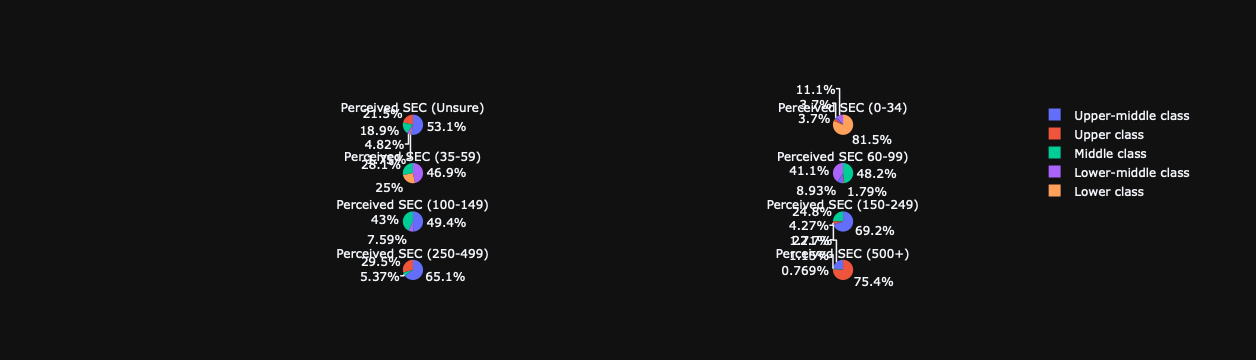

In [41]:
# df_unsure
# df_0
# df_35
# df_60
# df_100
# df_150
# df_250
# df_500

specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}],[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=4, cols=2, specs=specs)


fig.add_trace(
    go.Pie( 
        values=df_unsure['What is your perceived socioeconomic status?'].value_counts().values,
        labels=df_unsure['What is your perceived socioeconomic status?'].value_counts().index,
        title='Perceived SEC (Unsure)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        values=df_0['What is your perceived socioeconomic status?'].value_counts().values,
        labels=df_0['What is your perceived socioeconomic status?'].value_counts().index,
        title='Perceived SEC (0-34)'
    ),
    row=1, col=2)

fig.add_trace(
    go.Pie( 
        values=df_35['What is your perceived socioeconomic status?'].value_counts().values,
        labels=df_35['What is your perceived socioeconomic status?'].value_counts().index,
        title='Perceived SEC (35-59)'
    ), 
     row=2, col=1)

fig.add_trace(
    go.Pie(
        values=df_60['What is your perceived socioeconomic status?'].value_counts().values,
        labels=df_60['What is your perceived socioeconomic status?'].value_counts().index,
        title='Perceived SEC 60-99)'
    ),
    row=2, col=2)

fig.add_trace(
    go.Pie( 
        values=df_100['What is your perceived socioeconomic status?'].value_counts().values,
        labels=df_100['What is your perceived socioeconomic status?'].value_counts().index,
        title='Perceived SEC (100-149)'
    ), 
     row=3, col=1)

fig.add_trace(
    go.Pie(
        values=df_150['What is your perceived socioeconomic status?'].value_counts().values,
        labels=df_150['What is your perceived socioeconomic status?'].value_counts().index,
        title='Perceived SEC (150-249)'
    ),
    row=3, col=2)

fig.add_trace(
    go.Pie( 
        values=df_250['What is your perceived socioeconomic status?'].value_counts().values,
        labels=df_250['What is your perceived socioeconomic status?'].value_counts().index,
        title='Perceived SEC (250-499)'
    ), 
     row=4, col=1)

fig.add_trace(
    go.Pie(
        values=df_500['What is your perceived socioeconomic status?'].value_counts().values,
        labels=df_500['What is your perceived socioeconomic status?'].value_counts().index,
        title='Perceived SEC (500+)'
    ),
    row=4, col=2)

plot(fig)
fig.show()

# GPA by Income

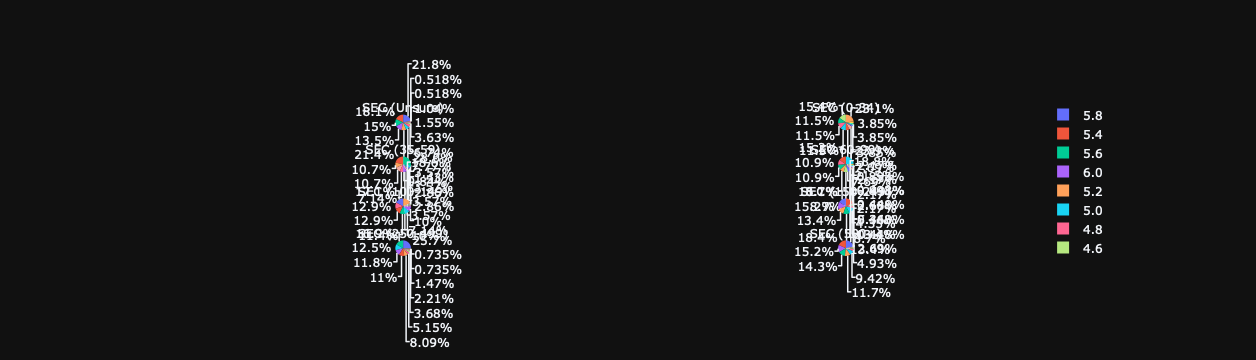

In [42]:
# df_unsure
# df_0
# df_35
# df_60
# df_100
# df_150
# df_250
# df_500

specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}],[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=4, cols=2, specs=specs)


fig.add_trace(
    go.Pie( 
        values=df_unsure['What was your rounded Winter 2021-2022 G.P.A.? (If you are between two numbers, round up to the closest decimal – a 5.3 G.P.A. would round to a 5.4. If you earned a Pass or multiple Passes, exclude this from your calculation.)'].value_counts().values,
        labels=df_unsure['What was your rounded Winter 2021-2022 G.P.A.? (If you are between two numbers, round up to the closest decimal – a 5.3 G.P.A. would round to a 5.4. If you earned a Pass or multiple Passes, exclude this from your calculation.)'].value_counts().index,
        title='SEC (Unsure)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        values=df_0['What was your rounded Winter 2021-2022 G.P.A.? (If you are between two numbers, round up to the closest decimal – a 5.3 G.P.A. would round to a 5.4. If you earned a Pass or multiple Passes, exclude this from your calculation.)'].value_counts().values,
        labels=df_0['What was your rounded Winter 2021-2022 G.P.A.? (If you are between two numbers, round up to the closest decimal – a 5.3 G.P.A. would round to a 5.4. If you earned a Pass or multiple Passes, exclude this from your calculation.)'].value_counts().index,
        title='SEC (0-34)'
    ),
    row=1, col=2)

fig.add_trace(
    go.Pie( 
        values=df_35['What was your rounded Winter 2021-2022 G.P.A.? (If you are between two numbers, round up to the closest decimal – a 5.3 G.P.A. would round to a 5.4. If you earned a Pass or multiple Passes, exclude this from your calculation.)'].value_counts().values,
        labels=df_35['What was your rounded Winter 2021-2022 G.P.A.? (If you are between two numbers, round up to the closest decimal – a 5.3 G.P.A. would round to a 5.4. If you earned a Pass or multiple Passes, exclude this from your calculation.)'].value_counts().index,
        title='SEC (35-59)'
    ), 
     row=2, col=1)

fig.add_trace(
    go.Pie(
        values=df_60['What was your rounded Winter 2021-2022 G.P.A.? (If you are between two numbers, round up to the closest decimal – a 5.3 G.P.A. would round to a 5.4. If you earned a Pass or multiple Passes, exclude this from your calculation.)'].value_counts().values,
        labels=df_60['What was your rounded Winter 2021-2022 G.P.A.? (If you are between two numbers, round up to the closest decimal – a 5.3 G.P.A. would round to a 5.4. If you earned a Pass or multiple Passes, exclude this from your calculation.)'].value_counts().index,
        title='SEC 60-99)'
    ),
    row=2, col=2)

fig.add_trace(
    go.Pie( 
        values=df_100['What was your rounded Winter 2021-2022 G.P.A.? (If you are between two numbers, round up to the closest decimal – a 5.3 G.P.A. would round to a 5.4. If you earned a Pass or multiple Passes, exclude this from your calculation.)'].value_counts().values,
        labels=df_100['What was your rounded Winter 2021-2022 G.P.A.? (If you are between two numbers, round up to the closest decimal – a 5.3 G.P.A. would round to a 5.4. If you earned a Pass or multiple Passes, exclude this from your calculation.)'].value_counts().index,
        title='SEC (100-149)'
    ), 
     row=3, col=1)

fig.add_trace(
    go.Pie(
        values=df_150['What was your rounded Winter 2021-2022 G.P.A.? (If you are between two numbers, round up to the closest decimal – a 5.3 G.P.A. would round to a 5.4. If you earned a Pass or multiple Passes, exclude this from your calculation.)'].value_counts().values,
        labels=df_150['What was your rounded Winter 2021-2022 G.P.A.? (If you are between two numbers, round up to the closest decimal – a 5.3 G.P.A. would round to a 5.4. If you earned a Pass or multiple Passes, exclude this from your calculation.)'].value_counts().index,
        title='SEC (150-249)'
    ),
    row=3, col=2)

fig.add_trace(
    go.Pie( 
        values=df_250['What was your rounded Winter 2021-2022 G.P.A.? (If you are between two numbers, round up to the closest decimal – a 5.3 G.P.A. would round to a 5.4. If you earned a Pass or multiple Passes, exclude this from your calculation.)'].value_counts().values,
        labels=df_250['What was your rounded Winter 2021-2022 G.P.A.? (If you are between two numbers, round up to the closest decimal – a 5.3 G.P.A. would round to a 5.4. If you earned a Pass or multiple Passes, exclude this from your calculation.)'].value_counts().index,
        title='SEC (250-499)'
    ), 
     row=4, col=1)

fig.add_trace(
    go.Pie(
        values=df_500['What was your rounded Winter 2021-2022 G.P.A.? (If you are between two numbers, round up to the closest decimal – a 5.3 G.P.A. would round to a 5.4. If you earned a Pass or multiple Passes, exclude this from your calculation.)'].value_counts().values,
        labels=df_500['What was your rounded Winter 2021-2022 G.P.A.? (If you are between two numbers, round up to the closest decimal – a 5.3 G.P.A. would round to a 5.4. If you earned a Pass or multiple Passes, exclude this from your calculation.)'].value_counts().index,
        title='SEC (500+)'
    ),
    row=4, col=2)

plot(fig)
fig.show()

# SUGGESTION (DC): INTERNATIONAL VS SEC AND POLITICS

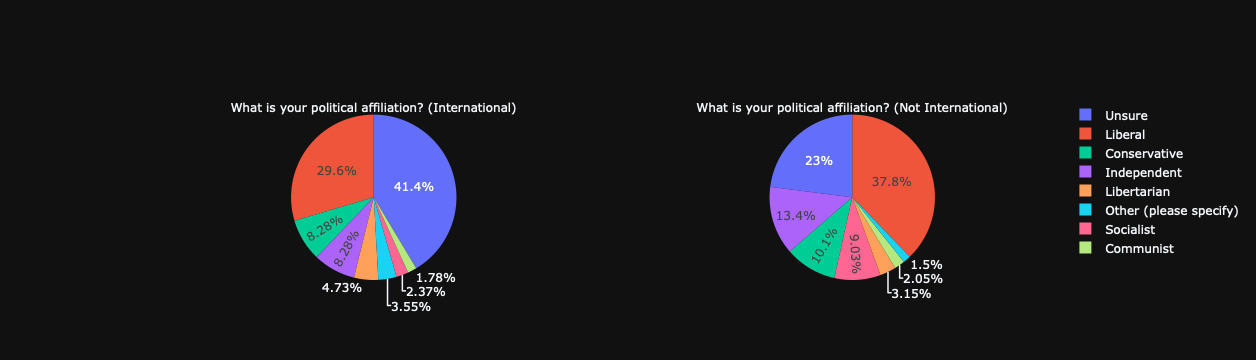

In [43]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])


fig.add_trace(
    go.Pie( 
        values=df_international['What is your political affiliation?'].value_counts().values, 
        labels=df_international['What is your political affiliation?'].value_counts().index, 
        title='What is your political affiliation? (International)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_notinternational['What is your political affiliation?'].value_counts().index,
        values=df_notinternational['What is your political affiliation?'].value_counts().values,
        title='What is your political affiliation? (Not International)'
    ),
    row=1, col=2)

# plot(fig)
fig.show()

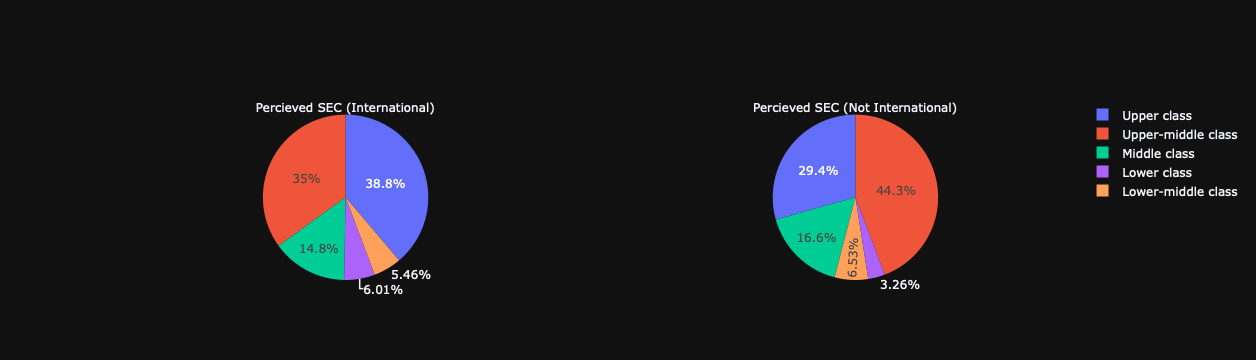

In [44]:
# What is your perceived socioeconomic status?
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])


fig.add_trace(
    go.Pie( 
        values=df_international['What is your perceived socioeconomic status?'].value_counts().values, 
        labels=df_international['What is your perceived socioeconomic status?'].value_counts().index, 
        title='Percieved SEC (International)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_notinternational['What is your perceived socioeconomic status?'].value_counts().index,
        values=df_notinternational['What is your perceived socioeconomic status?'].value_counts().values,
        title='Percieved SEC (Not International)'
    ),
    row=1, col=2)

# plot(fig)
fig.show()

In [45]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie( 
        values=df_international['What is your net family income?'].value_counts().values, 
        labels=df_international['What is your net family income?'].value_counts().index, 
        title='SEC (International)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_notinternational['What is your net family income?'].value_counts().index,
        values=df_notinternational['What is your net family income?'].value_counts().values,
        title='SEC (Not International)'
    ),
    row=1, col=2)

# plot(fig)
fig.show()

# Legacy v Income

In [46]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie( 
        values=df_legacy['What is your net family income?'].value_counts().values, 
        labels=df_legacy['What is your net family income?'].value_counts().index, 
        title='SEC (Legacy)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_nolegacy['What is your net family income?'].value_counts().index,
        values=df_nolegacy['What is your net family income?'].value_counts().values,
        title='SEC (Not Legacy)'
    ),
    row=1, col=2)

# plot(fig)
fig.show()

# Sexual Orientation vs Gender Identity

In [47]:
find_no(df_bi, df_sheher, 'bisexaul out of she/her')
find_no(df_demi, df_sheher, 'demisexaul out of she/her')
find_no(df_het, df_sheher, 'heterosexual out of she/her')
find_no(df_homo, df_sheher, 'homosexual out of she/her')
find_no(df_pan, df_sheher, 'pansexual out of she/her')
find_no(df_queer, df_sheher, 'queer out of she/her')
find_no(df_questioning, df_sheher, 'questioning out of she/her')
print()

find_no(df_bi, df_hehim, 'bisexaul out of he/him')
find_no(df_demi, df_hehim, 'demisexaul out of he/him')
find_no(df_het, df_hehim, 'heterosexual out of he/him')
find_no(df_homo, df_hehim, 'homosexual out of he/him')
find_no(df_pan, df_hehim, 'pansexual out of he/him')
find_no(df_queer, df_hehim, 'queer out of he/him')
find_no(df_questioning, df_hehim, 'questioning out of he/him')
print()

bisexaul out of she/her: 113 out of 471 , percentage : 23.991507430997878 %
demisexaul out of she/her: 8 out of 471 , percentage : 1.6985138004246285 %
heterosexual out of she/her: 276 out of 471 , percentage : 58.59872611464968 %
homosexual out of she/her: 19 out of 471 , percentage : 4.033970276008493 %
pansexual out of she/her: 17 out of 471 , percentage : 3.6093418259023355 %
queer out of she/her: 47 out of 471 , percentage : 9.978768577494693 %
questioning out of she/her: 52 out of 471 , percentage : 11.040339702760086 %

bisexaul out of he/him: 36 out of 446 , percentage : 8.071748878923767 %
demisexaul out of he/him: 5 out of 446 , percentage : 1.1210762331838564 %
heterosexual out of he/him: 370 out of 446 , percentage : 82.95964125560538 %
homosexual out of he/him: 22 out of 446 , percentage : 4.932735426008969 %
pansexual out of he/him: 7 out of 446 , percentage : 1.5695067264573992 %
queer out of he/him: 12 out of 446 , percentage : 2.690582959641256 %
questioning out of he/

# Varsity v SEC 

In [48]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie( 
        values=df_varsity['What is your net family income?'].value_counts().values, 
        labels=df_varsity['What is your net family income?'].value_counts().index, 
        title='SEC (Varsity)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_novarsity['What is your net family income?'].value_counts().index,
        values=df_novarsity['What is your net family income?'].value_counts().values,
        title='SEC (Not Varsity)'
    ),
    row=1, col=2)

# plot(fig)
fig.show()

# Varsity vs Race

In [49]:
race_correlations('Are you a varsity athlete?')

df_Asian : 380
No     212
Yes    168
Name: Are you a varsity athlete?, dtype: int64

df_Black : 110
No     60
Yes    50
Name: Are you a varsity athlete?, dtype: int64

df_NHPI : 12
Yes    7
No     5
Name: Are you a varsity athlete?, dtype: int64

df_Indigenous : 26
No     18
Yes     8
Name: Are you a varsity athlete?, dtype: int64

df_White : 543
Yes    284
No     259
Name: Are you a varsity athlete?, dtype: int64



# Class vs Class of Partner

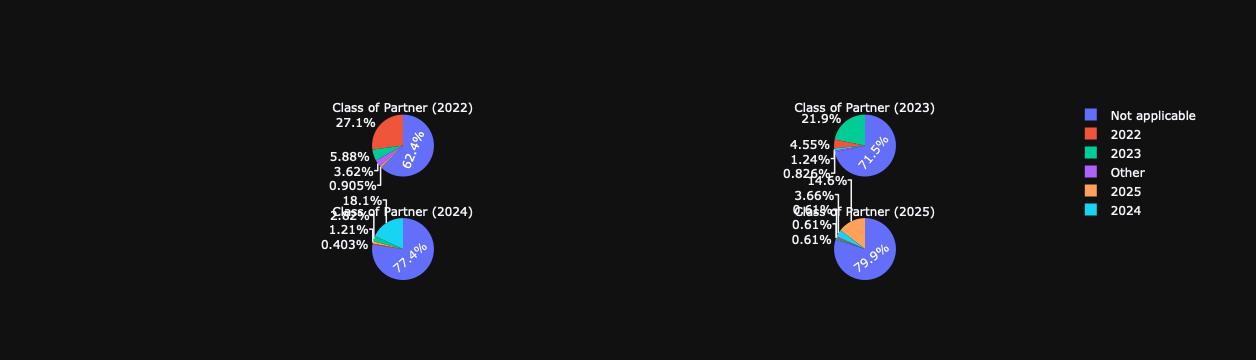

In [50]:
# By class
specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=2, specs=specs)

fig.add_trace(
    go.Pie( 
        values=df_2022['If you are currently in a committed relationship, what class is your partner in?'].value_counts().values, 
        labels=df_2022['If you are currently in a committed relationship, what class is your partner in?'].value_counts().index, 
        title='Class of Partner (2022)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_2023['If you are currently in a committed relationship, what class is your partner in?'].value_counts().index,
        values=df_2023['If you are currently in a committed relationship, what class is your partner in?'].value_counts().values,
        title='Class of Partner (2023)'
    ),
    row=1, col=2)

fig.add_trace(
    go.Pie( 
        values=df_2024['If you are currently in a committed relationship, what class is your partner in?'].value_counts().values, 
        labels=df_2024['If you are currently in a committed relationship, what class is your partner in?'].value_counts().index, 
        title='Class of Partner (2024)'
    ), 
     row=2, col=1)

fig.add_trace(
    go.Pie(
        labels=df_2025['If you are currently in a committed relationship, what class is your partner in?'].value_counts().index,
        values=df_2025['If you are currently in a committed relationship, what class is your partner in?'].value_counts().values,
        title='Class of Partner (2025)'
    ),
    row=2, col=2)

# plot(fig)
fig.show()
fig.write_html("temp.html")

---

# Politics and Worldview

# Political affiliation and gender identity

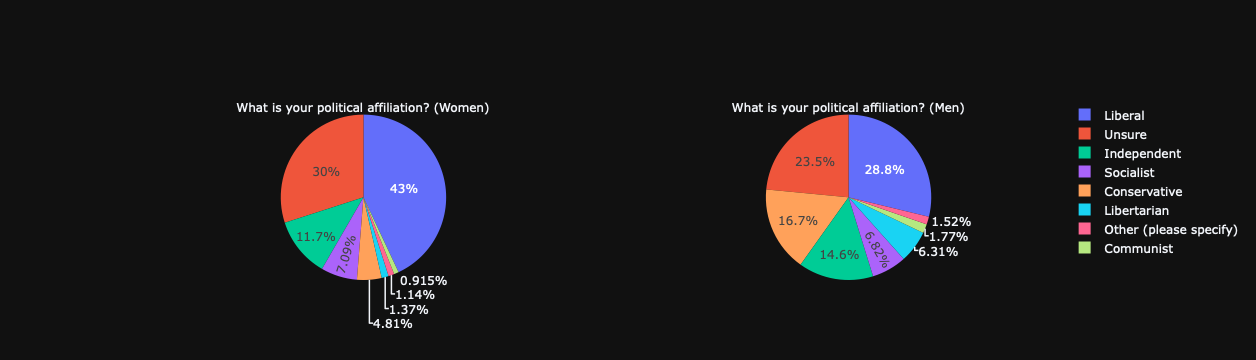

In [51]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])


fig.add_trace(
    go.Pie( 
        values=df_Woman['What is your political affiliation?'].value_counts().values, 
        labels=df_Woman['What is your political affiliation?'].value_counts().index, 
        title='What is your political affiliation? (Women)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_Man['What is your political affiliation?'].value_counts().index,
        values=df_Man['What is your political affiliation?'].value_counts().values,
        title='What is your political affiliation? (Men)'
    ),
    row=1, col=2)

# plot(fig)
fig.show()

## Varsity athletics and political affiliation

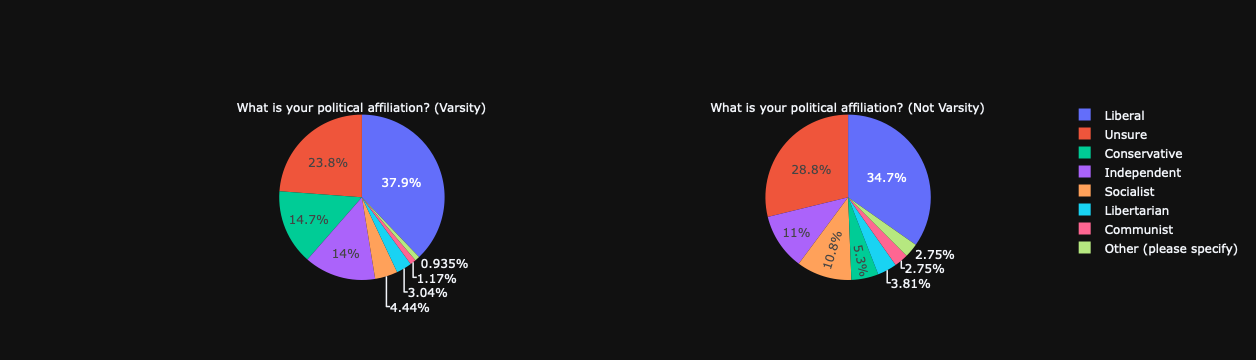

In [52]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])


fig.add_trace(
    go.Pie( 
        values=df_varsity['What is your political affiliation?'].value_counts().values, 
        labels=df_varsity['What is your political affiliation?'].value_counts().index, 
        title='What is your political affiliation? (Varsity)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_novarsity['What is your political affiliation?'].value_counts().index,
        values=df_novarsity['What is your political affiliation?'].value_counts().values,
        title='What is your political affiliation? (Not Varsity)'
    ),
    row=1, col=2)

# plot(fig)
fig.show()

## Have your political beliefs cahnged and current political affiliation

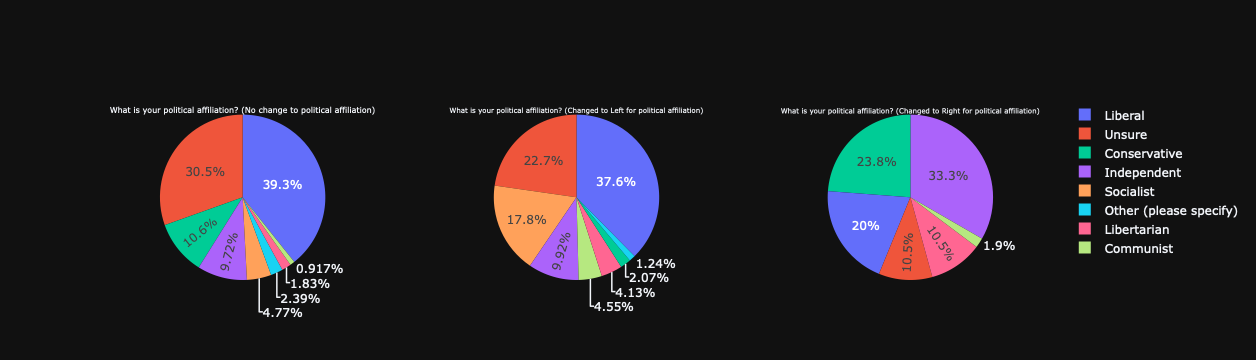

In [53]:
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]])


fig.add_trace(
    go.Pie( 
        values=df_nochange['What is your political affiliation?'].value_counts().values, 
        labels=df_nochange['What is your political affiliation?'].value_counts().index, 
        title='What is your political affiliation? (No change to political affiliation)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_changeleft['What is your political affiliation?'].value_counts().index,
        values=df_changeleft['What is your political affiliation?'].value_counts().values,
        title='What is your political affiliation? (Changed to Left for political affiliation)'
    ),
    row=1, col=2)

fig.add_trace(
    go.Pie(
        labels=df_changeright['What is your political affiliation?'].value_counts().index,
        values=df_changeright['What is your political affiliation?'].value_counts().values,
        title='What is your political affiliation? (Changed to Right for political affiliation)'
    ),
    row=1, col=3)

# plot(fig)
fig.show()

## Mention of political affiliation and current events knowledge

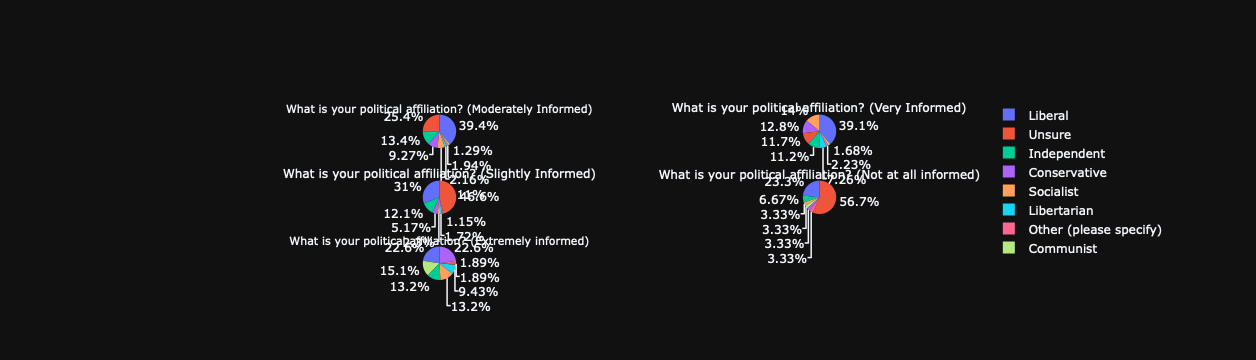

In [54]:
specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}],[{'type':'domain'},{'type':'domain'}]]
fig = make_subplots(rows=3, cols=2, specs=specs)

fig.add_trace(
    go.Pie( 
        values=df_ModeratelyInformed['What is your political affiliation?'].value_counts().values, 
        labels=df_ModeratelyInformed['What is your political affiliation?'].value_counts().index, 
        title='What is your political affiliation? (Moderately Informed)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_VeryInformed['What is your political affiliation?'].value_counts().index,
        values=df_VeryInformed['What is your political affiliation?'].value_counts().values,
        title='What is your political affiliation? (Very Informed)'
    ),
    row=1, col=2)

fig.add_trace(
    go.Pie(
        labels=df_SlightlyInformed['What is your political affiliation?'].value_counts().index,
        values=df_SlightlyInformed['What is your political affiliation?'].value_counts().values,
        title='What is your political affiliation? (Slightly Informed)'
    ),
    row=2, col=1)

fig.add_trace(
    go.Pie(
        labels=df_NotInformed['What is your political affiliation?'].value_counts().index,
        values=df_NotInformed['What is your political affiliation?'].value_counts().values,
        title='What is your political affiliation? (Not at all informed)'
    ),
    row=2, col=2)

fig.add_trace(
    go.Pie(
        labels=df_ExtremelyInformed['What is your political affiliation?'].value_counts().index,
        values=df_ExtremelyInformed['What is your political affiliation?'].value_counts().values,
        title='What is your political affiliation? (Extremely informed)'
    ),
    row=3, col=1)

plot(fig)
fig.show()

# Political Orientation vs Censorship

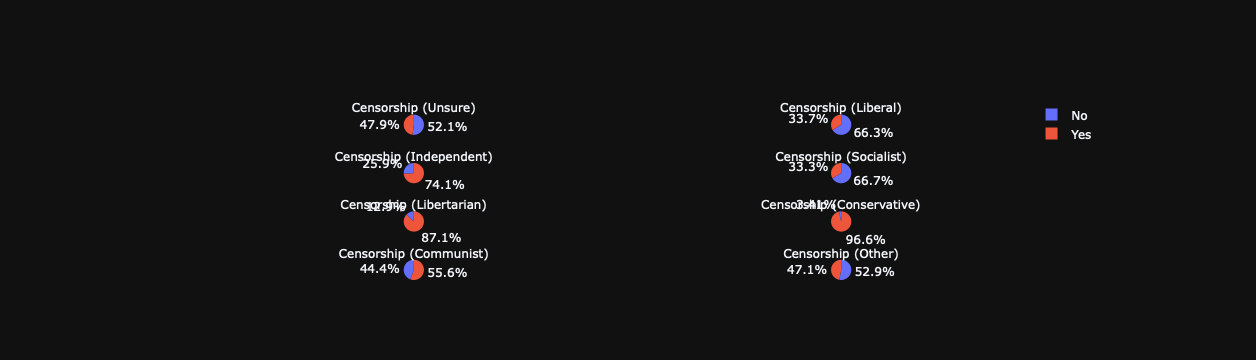

In [55]:
# df_Unsure
# df_Liberal
# df_Independent
# df_Socialist
# df_Libertarian
# df_Conservative
# df_Communist
# df_Other
# df_nan

specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}],[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=4, cols=2, specs=specs)


fig.add_trace(
    go.Pie( 
        values=df_Unsure['While at Andover, have you ever felt the need to censor yourself due to your political leaning?  '].value_counts().values,
        labels=df_Unsure['While at Andover, have you ever felt the need to censor yourself due to your political leaning?  '].value_counts().index,
        title='Censorship (Unsure)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_Liberal['While at Andover, have you ever felt the need to censor yourself due to your political leaning?  '].value_counts().index,
        values=df_Liberal['While at Andover, have you ever felt the need to censor yourself due to your political leaning?  '].value_counts().values,
        title='Censorship (Liberal)'
    ),
    row=1, col=2)

fig.add_trace(
    go.Pie( 
        values=df_Independent['While at Andover, have you ever felt the need to censor yourself due to your political leaning?  '].value_counts().values,
        labels=df_Independent['While at Andover, have you ever felt the need to censor yourself due to your political leaning?  '].value_counts().index,
        title='Censorship (Independent)'
    ), 
     row=2, col=1)

fig.add_trace(
    go.Pie(
        labels=df_Socialist['While at Andover, have you ever felt the need to censor yourself due to your political leaning?  '].value_counts().index,
        values=df_Socialist['While at Andover, have you ever felt the need to censor yourself due to your political leaning?  '].value_counts().values,
        title='Censorship (Socialist)'
    ),
    row=2, col=2)

fig.add_trace(
    go.Pie( 
        values=df_Libertarian['While at Andover, have you ever felt the need to censor yourself due to your political leaning?  '].value_counts().values,
        labels=df_Libertarian['While at Andover, have you ever felt the need to censor yourself due to your political leaning?  '].value_counts().index,
        title='Censorship (Libertarian)'
    ), 
     row=3, col=1)

fig.add_trace(
    go.Pie(
        labels=df_Conservative['While at Andover, have you ever felt the need to censor yourself due to your political leaning?  '].value_counts().index,
        values=df_Conservative['While at Andover, have you ever felt the need to censor yourself due to your political leaning?  '].value_counts().values,
        title='Censorship (Conservative)'
    ),
    row=3, col=2)

fig.add_trace(
    go.Pie( 
        values=df_Communist['While at Andover, have you ever felt the need to censor yourself due to your political leaning?  '].value_counts().values,
        labels=df_Communist['While at Andover, have you ever felt the need to censor yourself due to your political leaning?  '].value_counts().index,
        title='Censorship (Communist)'
    ), 
     row=4, col=1)

fig.add_trace(
    go.Pie(
        labels=df_Other['While at Andover, have you ever felt the need to censor yourself due to your political leaning?  '].value_counts().index,
        values=df_Other['While at Andover, have you ever felt the need to censor yourself due to your political leaning?  '].value_counts().values,
        title='Censorship (Other)'
    ),
    row=4, col=2)

plot(fig)
fig.show()

## Affirmative Action

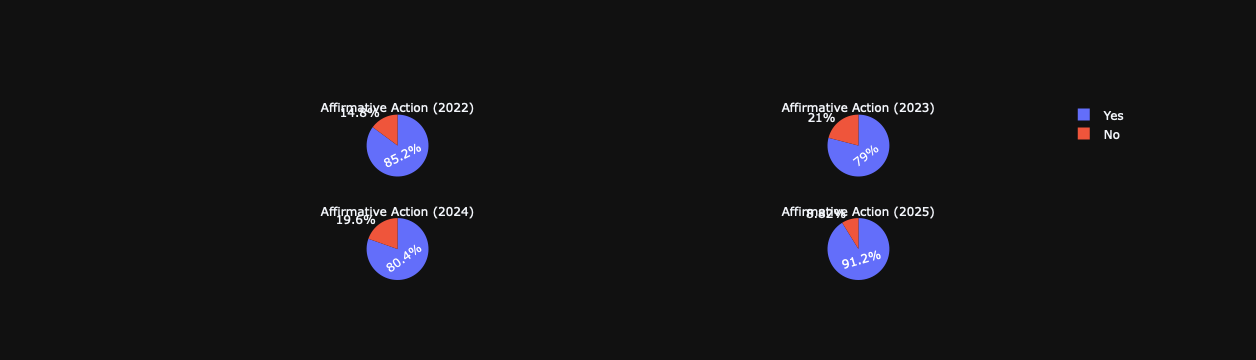

In [56]:
# By class
specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=2, specs=specs)

fig.add_trace(
    go.Pie( 
        values=df_2022['Do you support affirmative action in academic institutions—“positive steps taken to increase the representation of women and minorities in areas of employment, education, and culture from which they have been historically excluded” (Stanford University)?'].value_counts().values, 
        labels=df_2022['Do you support affirmative action in academic institutions—“positive steps taken to increase the representation of women and minorities in areas of employment, education, and culture from which they have been historically excluded” (Stanford University)?'].value_counts().index, 
        title='Affirmative Action (2022)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_2023['Do you support affirmative action in academic institutions—“positive steps taken to increase the representation of women and minorities in areas of employment, education, and culture from which they have been historically excluded” (Stanford University)?'].value_counts().index,
        values=df_2023['Do you support affirmative action in academic institutions—“positive steps taken to increase the representation of women and minorities in areas of employment, education, and culture from which they have been historically excluded” (Stanford University)?'].value_counts().values,
        title='Affirmative Action (2023)'
    ),
    row=1, col=2)

fig.add_trace(
    go.Pie( 
        values=df_2024['Do you support affirmative action in academic institutions—“positive steps taken to increase the representation of women and minorities in areas of employment, education, and culture from which they have been historically excluded” (Stanford University)?'].value_counts().values, 
        labels=df_2024['Do you support affirmative action in academic institutions—“positive steps taken to increase the representation of women and minorities in areas of employment, education, and culture from which they have been historically excluded” (Stanford University)?'].value_counts().index, 
        title='Affirmative Action (2024)'
    ), 
     row=2, col=1)

fig.add_trace(
    go.Pie(
        labels=df_2025['Do you support affirmative action in academic institutions—“positive steps taken to increase the representation of women and minorities in areas of employment, education, and culture from which they have been historically excluded” (Stanford University)?'].value_counts().index,
        values=df_2025['Do you support affirmative action in academic institutions—“positive steps taken to increase the representation of women and minorities in areas of employment, education, and culture from which they have been historically excluded” (Stanford University)?'].value_counts().values,
        title='Affirmative Action (2025)'
    ),
    row=2, col=2)

# plot(fig)
fig.show()

# Affirmative Action by Race

In [57]:
race_correlations('Do you support affirmative action in academic institutions—“positive steps taken to increase the representation of women and minorities in areas of employment, education, and culture from which they have been historically excluded” (Stanford University)?')

df_Asian : 380
Yes    285
No      73
Name: Do you support affirmative action in academic institutions—“positive steps taken to increase the representation of women and minorities in areas of employment, education, and culture from which they have been historically excluded” (Stanford University)?, dtype: int64

df_Black : 110
Yes    100
No       6
Name: Do you support affirmative action in academic institutions—“positive steps taken to increase the representation of women and minorities in areas of employment, education, and culture from which they have been historically excluded” (Stanford University)?, dtype: int64

df_NHPI : 12
Yes    8
No     3
Name: Do you support affirmative action in academic institutions—“positive steps taken to increase the representation of women and minorities in areas of employment, education, and culture from which they have been historically excluded” (Stanford University)?, dtype: int64

df_Indigenous : 26
Yes    24
No      1
Name: Do you support affirma

# Affirmative Action by Gender Identity

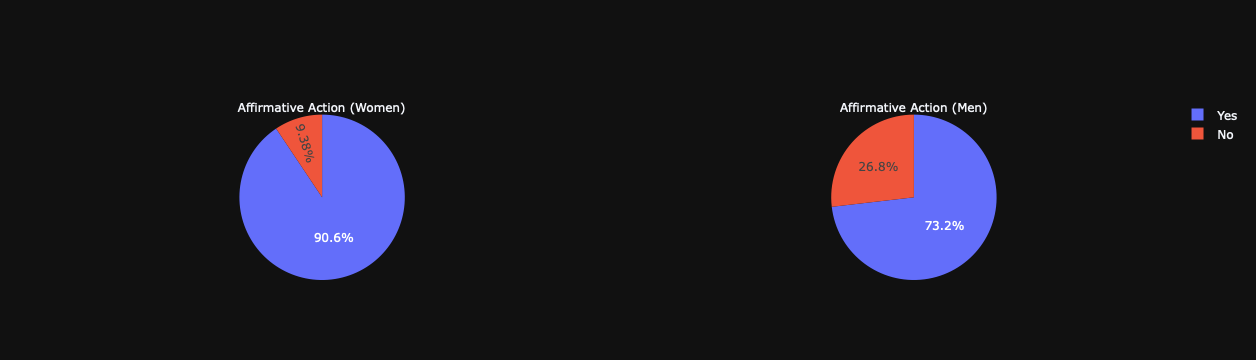

In [58]:
# By gender
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie( 
        values=df_Woman['Do you support affirmative action in academic institutions—“positive steps taken to increase the representation of women and minorities in areas of employment, education, and culture from which they have been historically excluded” (Stanford University)?'].value_counts().values, 
        labels=df_Woman['Do you support affirmative action in academic institutions—“positive steps taken to increase the representation of women and minorities in areas of employment, education, and culture from which they have been historically excluded” (Stanford University)?'].value_counts().index, 
        title='Affirmative Action (Women)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_Man['Do you support affirmative action in academic institutions—“positive steps taken to increase the representation of women and minorities in areas of employment, education, and culture from which they have been historically excluded” (Stanford University)?'].value_counts().index,
        values=df_Man['Do you support affirmative action in academic institutions—“positive steps taken to increase the representation of women and minorities in areas of employment, education, and culture from which they have been historically excluded” (Stanford University)?'].value_counts().values,
        title='Affirmative Action (Men)'
    ),
    row=1, col=2)

# plot(fig)
fig.show()

# FEMINISM BY GENDER IDENTITY

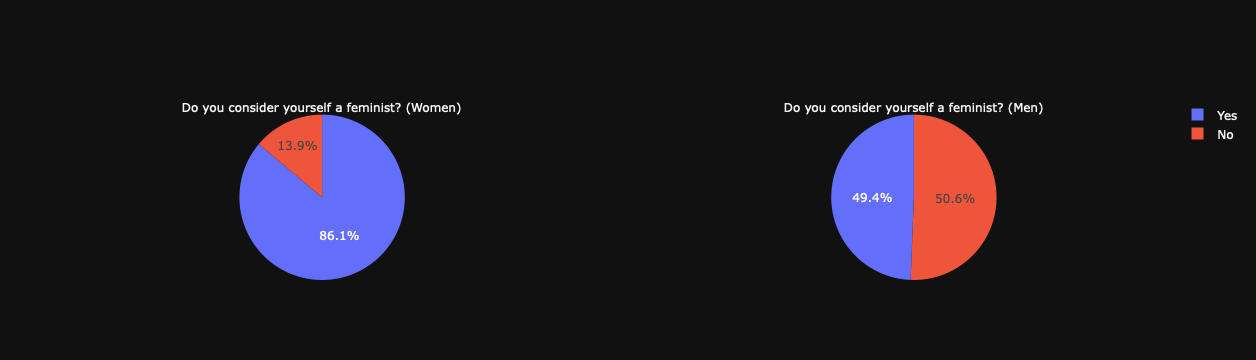

In [59]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])


fig.add_trace(
    go.Pie( 
        values=df_Woman['Do you consider yourself a feminist?'].value_counts().values, 
        labels=df_Woman['Do you consider yourself a feminist?'].value_counts().index, 
        title='Do you consider yourself a feminist? (Women)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_Man['Do you consider yourself a feminist?'].value_counts().index,
        values=df_Man['Do you consider yourself a feminist?'].value_counts().values,
        title='Do you consider yourself a feminist? (Men)'
    ),
    row=1, col=2)

# plot(fig)
fig.show()

# Reverse Racism

In [60]:
race_correlations('Racism is defined as “the systemic subordination of members of targeted racial groups who have relatively little social power” (Vanderbilt University). Do you believe that white people can experience racism (colloquially known as reverse racism)?')

df_Asian : 380
No     245
Yes    116
Name: Racism is defined as “the systemic subordination of members of targeted racial groups who have relatively little social power” (Vanderbilt University). Do you believe that white people can experience racism (colloquially known as reverse racism)?, dtype: int64

df_Black : 110
No     95
Yes    11
Name: Racism is defined as “the systemic subordination of members of targeted racial groups who have relatively little social power” (Vanderbilt University). Do you believe that white people can experience racism (colloquially known as reverse racism)?, dtype: int64

df_NHPI : 12
No     8
Yes    3
Name: Racism is defined as “the systemic subordination of members of targeted racial groups who have relatively little social power” (Vanderbilt University). Do you believe that white people can experience racism (colloquially known as reverse racism)?, dtype: int64

df_Indigenous : 26
No     19
Yes     6
Name: Racism is defined as “the systemic subordination

# Abortion Rights vs Gender

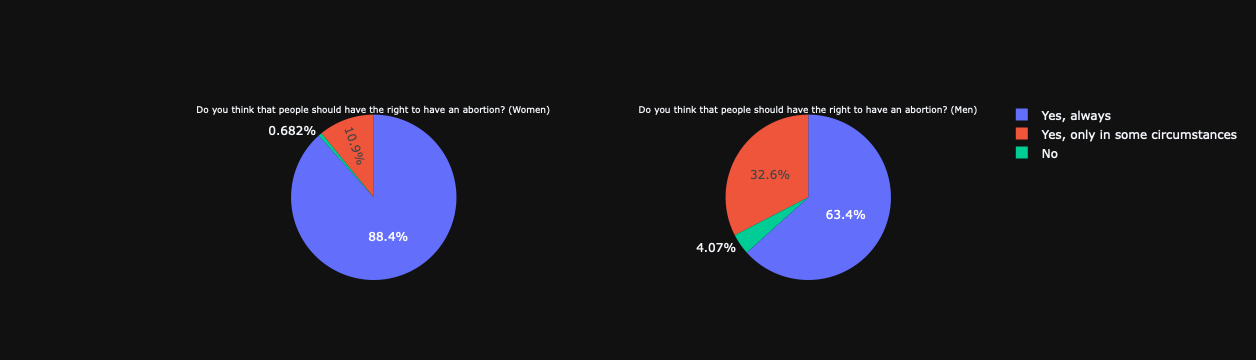

In [61]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])


fig.add_trace(
    go.Pie( 
        values=df_Woman['Do you think that people should have the right to have an abortion?'].value_counts().values, 
        labels=df_Woman['Do you think that people should have the right to have an abortion?'].value_counts().index, 
        title='Do you think that people should have the right to have an abortion? (Women)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_Man['Do you think that people should have the right to have an abortion?'].value_counts().index,
        values=df_Man['Do you think that people should have the right to have an abortion?'].value_counts().values,
        title='Do you think that people should have the right to have an abortion? (Men)'
    ),
    row=1, col=2)

# plot(fig)
fig.show()

# Prison System

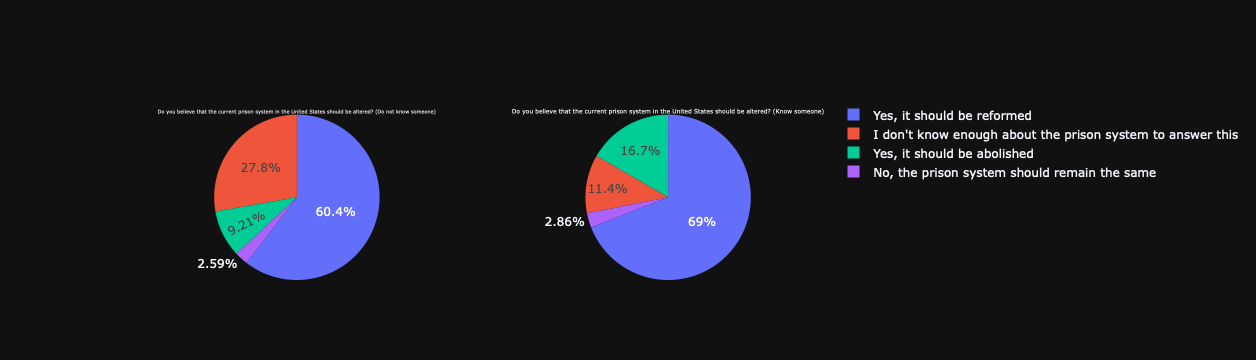

In [62]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])


fig.add_trace(
    go.Pie( 
        values=df_noKnowIncarcerated['Do you believe that the current prison system in the United States should be altered?'].value_counts().values, 
        labels=df_noKnowIncarcerated['Do you believe that the current prison system in the United States should be altered?'].value_counts().index, 
        title='Do you believe that the current prison system in the United States should be altered? (Do not know someone)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_KnowIncarcerated['Do you believe that the current prison system in the United States should be altered?'].value_counts().index,
        values=df_KnowIncarcerated['Do you believe that the current prison system in the United States should be altered?'].value_counts().values,
        title='Do you believe that the current prison system in the United States should be altered? (Know someone)'
    ),
    row=1, col=2)

# plot(fig)
fig.show()

# Decriminalization drug x incarcerated

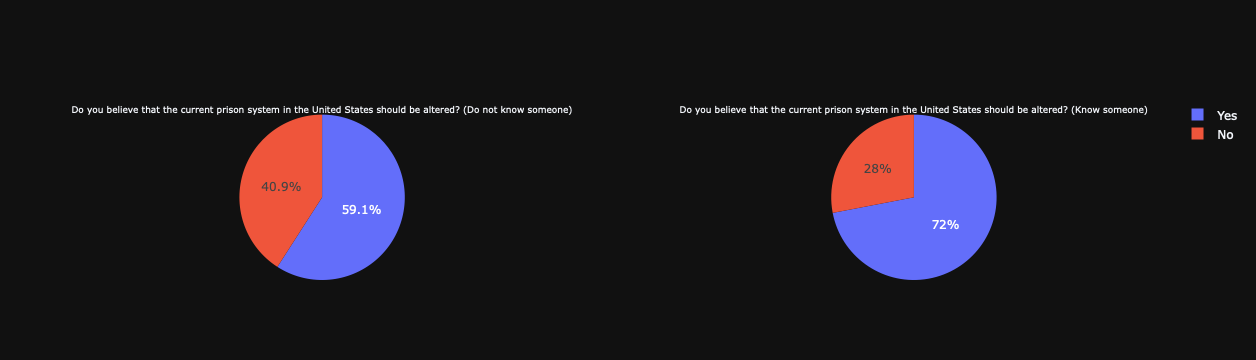

In [63]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])


fig.add_trace(
    go.Pie( 
        values=df_noKnowIncarcerated['Do you support the decriminalization of drugs—“eliminating criminal penalties for drug use and possession” (Drug Policy Alliance)?'].value_counts().values, 
        labels=df_noKnowIncarcerated['Do you support the decriminalization of drugs—“eliminating criminal penalties for drug use and possession” (Drug Policy Alliance)?'].value_counts().index, 
        title='Do you believe that the current prison system in the United States should be altered? (Do not know someone)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_KnowIncarcerated['Do you support the decriminalization of drugs—“eliminating criminal penalties for drug use and possession” (Drug Policy Alliance)?'].value_counts().index,
        values=df_KnowIncarcerated['Do you support the decriminalization of drugs—“eliminating criminal penalties for drug use and possession” (Drug Policy Alliance)?'].value_counts().values,
        title='Do you believe that the current prison system in the United States should be altered? (Know someone)'
    ),
    row=1, col=2)

# plot(fig)
fig.show()

# Household own Firearm vs Area

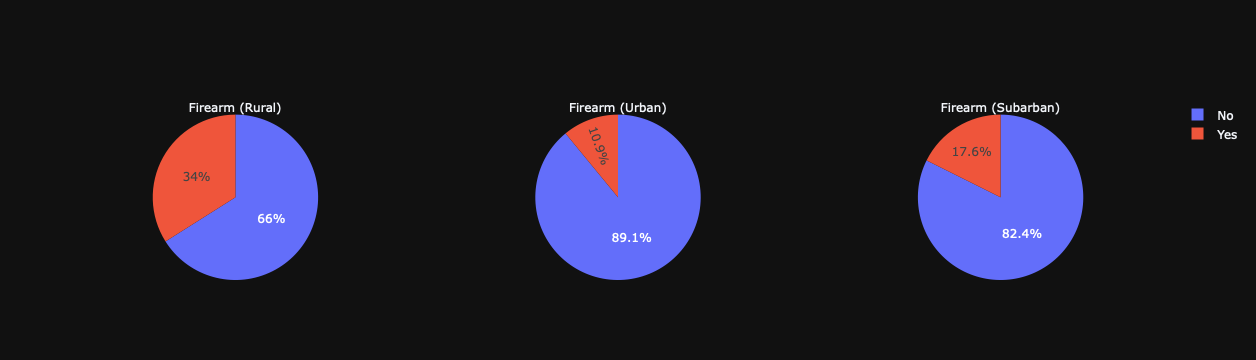

In [64]:
specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=1, cols=3, specs=specs)


fig.add_trace(
    go.Pie( 
        values=df_rural['Does your household own firearms?'].value_counts().values,
        labels=df_rural['Does your household own firearms?'].value_counts().index,
        title='Firearm (Rural)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_urban['Does your household own firearms?'].value_counts().index,
        values=df_urban['Does your household own firearms?'].value_counts().values,
        title='Firearm (Urban)'
    ),
    row=1, col=2)

fig.add_trace(
    go.Pie( 
        values=df_suburban['Does your household own firearms?'].value_counts().values,
        labels=df_suburban['Does your household own firearms?'].value_counts().index,
        title='Firearm (Subarban)'
    ), 
     row=1, col=3)

plot(fig)
fig.show()

# Firearm Ownership x political

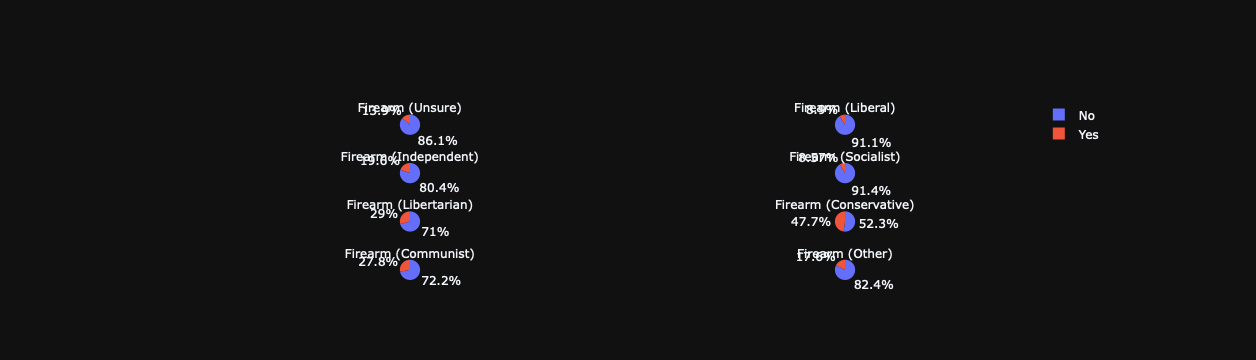

In [65]:
# df_Unsure
# df_Liberal
# df_Independent
# df_Socialist
# df_Libertarian
# df_Conservative
# df_Communist
# df_Other
# df_nan

specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}],[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=4, cols=2, specs=specs)


fig.add_trace(
    go.Pie( 
        values=df_Unsure['Does your household own firearms?'].value_counts().values,
        labels=df_Unsure['Does your household own firearms?'].value_counts().index,
        title='Firearm (Unsure)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_Liberal['Does your household own firearms?'].value_counts().index,
        values=df_Liberal['Does your household own firearms?'].value_counts().values,
        title='Firearm (Liberal)'
    ),
    row=1, col=2)

fig.add_trace(
    go.Pie( 
        values=df_Independent['Does your household own firearms?'].value_counts().values,
        labels=df_Independent['Does your household own firearms?'].value_counts().index,
        title='Firearm (Independent)'
    ), 
     row=2, col=1)

fig.add_trace(
    go.Pie(
        labels=df_Socialist['Does your household own firearms?'].value_counts().index,
        values=df_Socialist['Does your household own firearms?'].value_counts().values,
        title='Firearm (Socialist)'
    ),
    row=2, col=2)

fig.add_trace(
    go.Pie( 
        values=df_Libertarian['Does your household own firearms?'].value_counts().values,
        labels=df_Libertarian['Does your household own firearms?'].value_counts().index,
        title='Firearm (Libertarian)'
    ), 
     row=3, col=1)

fig.add_trace(
    go.Pie(
        labels=df_Conservative['Does your household own firearms?'].value_counts().index,
        values=df_Conservative['Does your household own firearms?'].value_counts().values,
        title='Firearm (Conservative)'
    ),
    row=3, col=2)

fig.add_trace(
    go.Pie( 
        values=df_Communist['Does your household own firearms?'].value_counts().values,
        labels=df_Communist['Does your household own firearms?'].value_counts().index,
        title='Firearm (Communist)'
    ), 
     row=4, col=1)

fig.add_trace(
    go.Pie(
        labels=df_Other['Does your household own firearms?'].value_counts().index,
        values=df_Other['Does your household own firearms?'].value_counts().values,
        title='Firearm (Other)'
    ),
    row=4, col=2)

plot(fig)
fig.show()

# Firearm by Income

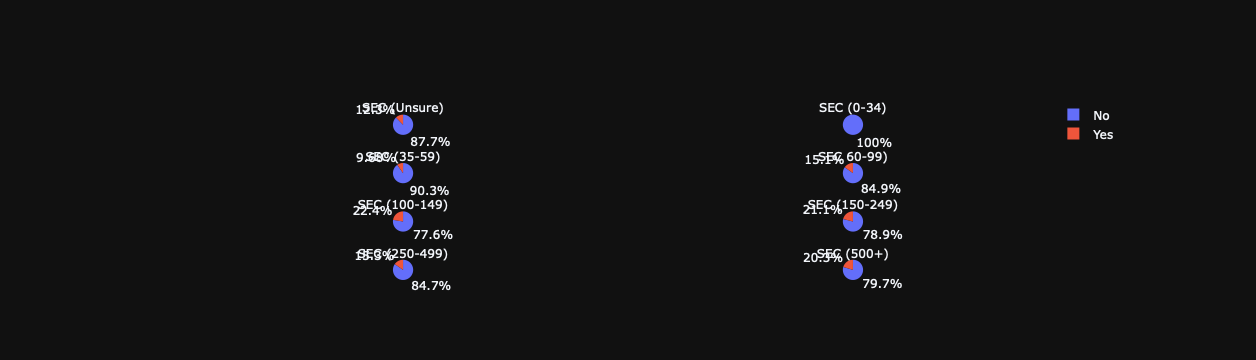

In [66]:
specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}],[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=4, cols=2, specs=specs)


fig.add_trace(
    go.Pie( 
        values=df_unsure['Does your household own firearms?'].value_counts().values,
        labels=df_unsure['Does your household own firearms?'].value_counts().index,
        title='SEC (Unsure)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        values=df_0['Does your household own firearms?'].value_counts().values,
        labels=df_0['Does your household own firearms?'].value_counts().index,
        title='SEC (0-34)'
    ),
    row=1, col=2)

fig.add_trace(
    go.Pie( 
        values=df_35['Does your household own firearms?'].value_counts().values,
        labels=df_35['Does your household own firearms?'].value_counts().index,
        title='SEC (35-59)'
    ), 
     row=2, col=1)

fig.add_trace(
    go.Pie(
        values=df_60['Does your household own firearms?'].value_counts().values,
        labels=df_60['Does your household own firearms?'].value_counts().index,
        title='SEC 60-99)'
    ),
    row=2, col=2)

fig.add_trace(
    go.Pie( 
        values=df_100['Does your household own firearms?'].value_counts().values,
        labels=df_100['Does your household own firearms?'].value_counts().index,
        title='SEC (100-149)'
    ), 
     row=3, col=1)

fig.add_trace(
    go.Pie(
        values=df_150['Does your household own firearms?'].value_counts().values,
        labels=df_150['Does your household own firearms?'].value_counts().index,
        title='SEC (150-249)'
    ),
    row=3, col=2)

fig.add_trace(
    go.Pie( 
        values=df_250['Does your household own firearms?'].value_counts().values,
        labels=df_250['Does your household own firearms?'].value_counts().index,
        title='SEC (250-499)'
    ), 
     row=4, col=1)

fig.add_trace(
    go.Pie(
        values=df_500['Does your household own firearms?'].value_counts().values,
        labels=df_500['Does your household own firearms?'].value_counts().index,
        title='SEC (500+)'
    ),
    row=4, col=2)

plot(fig)
fig.show()

# Student Leadership by Political Affiliation

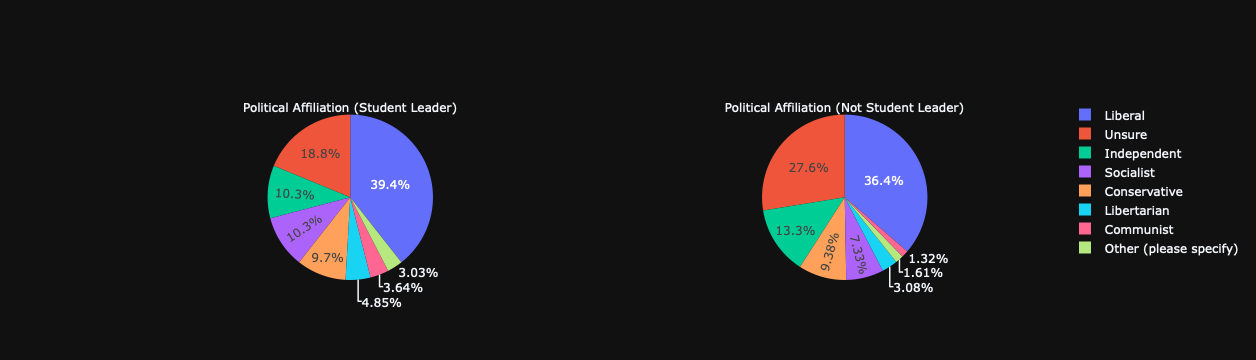

In [67]:
specs = [[{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=1, cols=2, specs=specs)

fig.add_trace(
    go.Pie( 
        values=df_leader['What is your political affiliation?'].value_counts().values,
        labels=df_leader['What is your political affiliation?'].value_counts().index,
        title='Political Affiliation (Student Leader)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_noleader['What is your political affiliation?'].value_counts().index,
        values=df_noleader['What is your political affiliation?'].value_counts().values,
        title='Political Affiliation (Not Student Leader)'
    ),
    row=1, col=2)

# plot(fig)
fig.show()


---
# Wellness

## Body Insecurity by Gender

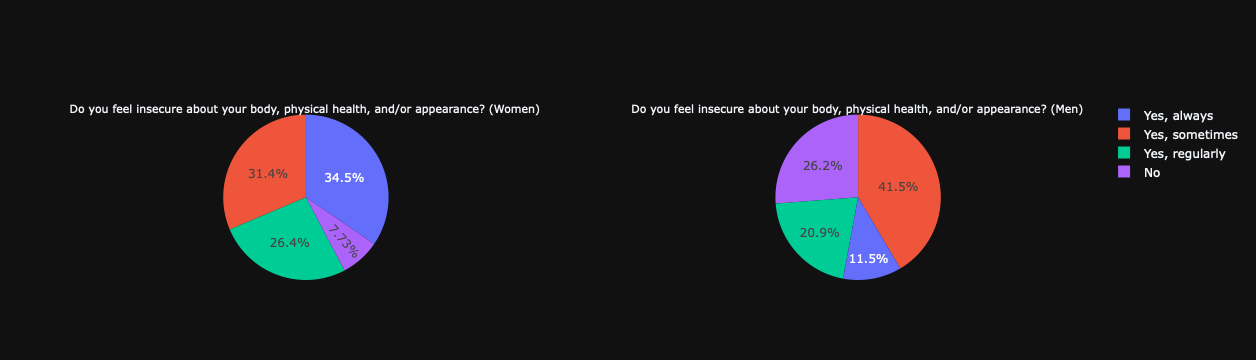

In [68]:
# Do you feel insecure about your body, physical health, and/or appearance?
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])


fig.add_trace(
    go.Pie( 
        values=df_Woman['Do you feel insecure about your body, physical health, and/or appearance?'].value_counts().values, 
        labels=df_Woman['Do you feel insecure about your body, physical health, and/or appearance?'].value_counts().index, 
        title='Do you feel insecure about your body, physical health, and/or appearance? (Women)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_Man['Do you feel insecure about your body, physical health, and/or appearance?'].value_counts().index,
        values=df_Man['Do you feel insecure about your body, physical health, and/or appearance?'].value_counts().values,
        title='Do you feel insecure about your body, physical health, and/or appearance? (Men)'
    ),
    row=1, col=2)

# plot(fig)
fig.show()

## Body Insecurity by Varsity

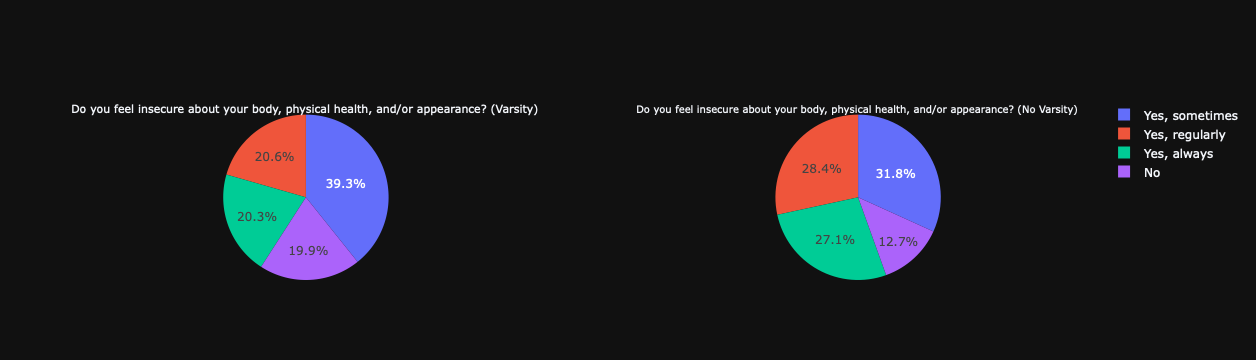

In [69]:
# Do you feel insecure about your body, physical health, and/or appearance?
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])


fig.add_trace(
    go.Pie( 
        values=df_varsity['Do you feel insecure about your body, physical health, and/or appearance?'].value_counts().values, 
        labels=df_varsity['Do you feel insecure about your body, physical health, and/or appearance?'].value_counts().index, 
        title='Do you feel insecure about your body, physical health, and/or appearance? (Varsity)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_novarsity['Do you feel insecure about your body, physical health, and/or appearance?'].value_counts().index,
        values=df_novarsity['Do you feel insecure about your body, physical health, and/or appearance?'].value_counts().values,
        title='Do you feel insecure about your body, physical health, and/or appearance? (No Varsity)'
    ),
    row=1, col=2)

# plot(fig)
fig.show()

# Sykes vs Support enough

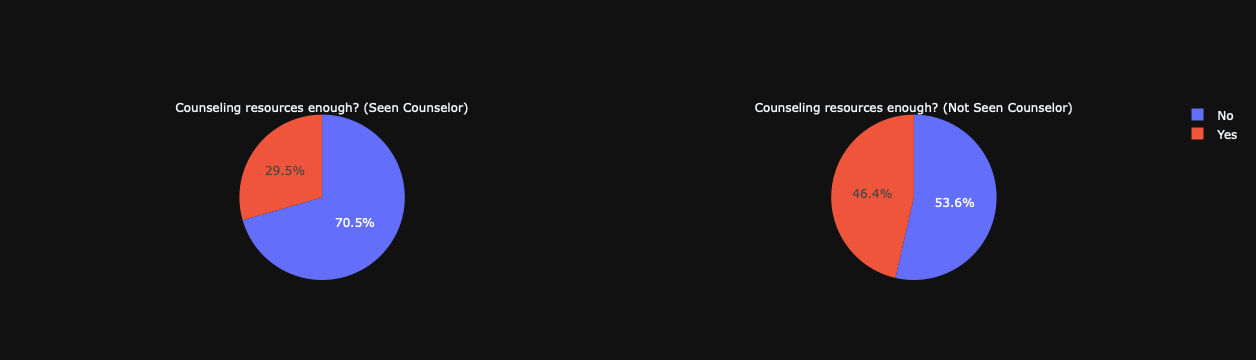

In [70]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])


fig.add_trace(
    go.Pie( 
        values=df_seencounselor['Do you think that the mental health and counseling resources provided by the Sykes Wellness Center are sufficient?'].value_counts().values, 
        labels=df_seencounselor['Do you think that the mental health and counseling resources provided by the Sykes Wellness Center are sufficient?'].value_counts().index, 
        title='Counseling resources enough? (Seen Counselor)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_notseencounselor['Do you think that the mental health and counseling resources provided by the Sykes Wellness Center are sufficient?'].value_counts().index,
        values=df_notseencounselor['Do you think that the mental health and counseling resources provided by the Sykes Wellness Center are sufficient?'].value_counts().values,
        title='Counseling resources enough? (Not Seen Counselor)'
    ),
    row=1, col=2)

# plot(fig)
fig.show()

# Happy vs Income

In [71]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie( 
        values=df_happy['What is your net family income?'].value_counts().values, 
        labels=df_happy['What is your net family income?'].value_counts().index, 
        title='Happy vs GPA'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_nohappy['What is your net family income?'].value_counts().index,
        values=df_nohappy['What is your net family income?'].value_counts().values,
        title='Not Happy vs GPA'
    ),
    row=1, col=2)

# plot(fig)
fig.show()

# Happy vs Percieved SEC

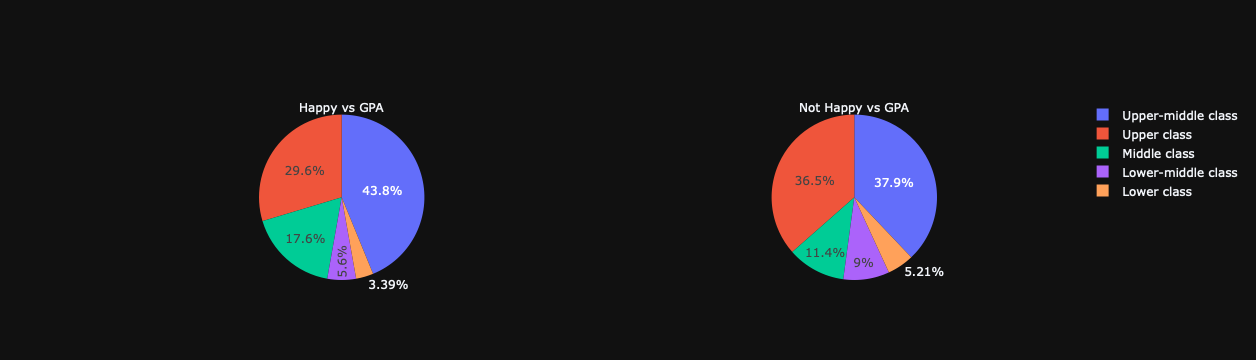

In [72]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie( 
        values=df_happy['What is your perceived socioeconomic status?'].value_counts().values, 
        labels=df_happy['What is your perceived socioeconomic status?'].value_counts().index, 
        title='Happy vs GPA'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_nohappy['What is your perceived socioeconomic status?'].value_counts().index,
        values=df_nohappy['What is your perceived socioeconomic status?'].value_counts().values,
        title='Not Happy vs GPA'
    ),
    row=1, col=2)

# plot(fig)
fig.show()

# Happy vs GPA

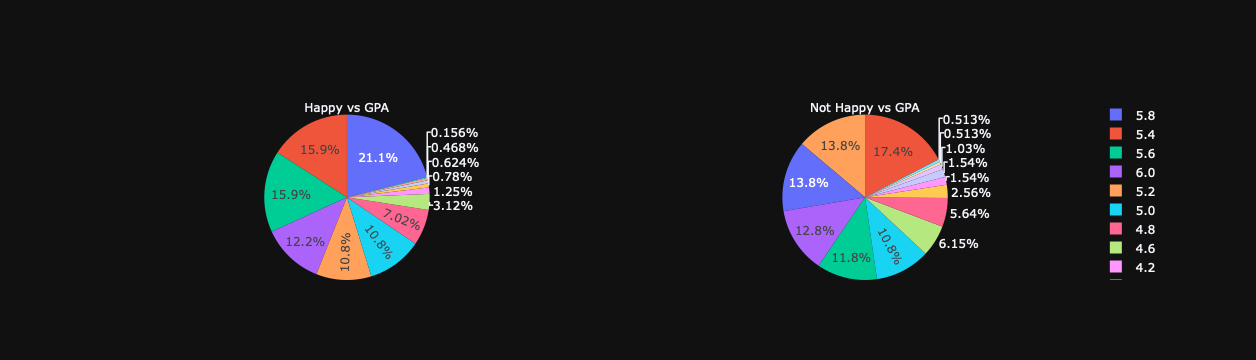

In [73]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie( 
        values=df_happy['What was your rounded Winter 2021-2022 G.P.A.? (If you are between two numbers, round up to the closest decimal – a 5.3 G.P.A. would round to a 5.4. If you earned a Pass or multiple Passes, exclude this from your calculation.)'].value_counts().values, 
        labels=df_happy['What was your rounded Winter 2021-2022 G.P.A.? (If you are between two numbers, round up to the closest decimal – a 5.3 G.P.A. would round to a 5.4. If you earned a Pass or multiple Passes, exclude this from your calculation.)'].value_counts().index, 
        title='Happy vs GPA'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_nohappy['What was your rounded Winter 2021-2022 G.P.A.? (If you are between two numbers, round up to the closest decimal – a 5.3 G.P.A. would round to a 5.4. If you earned a Pass or multiple Passes, exclude this from your calculation.)'].value_counts().index,
        values=df_nohappy['What was your rounded Winter 2021-2022 G.P.A.? (If you are between two numbers, round up to the closest decimal – a 5.3 G.P.A. would round to a 5.4. If you earned a Pass or multiple Passes, exclude this from your calculation.)'].value_counts().values,
        title='Not Happy vs GPA'
    ),
    row=1, col=2)

# plot(fig)
fig.show()

# Sykes mental health support and experience with mental illness

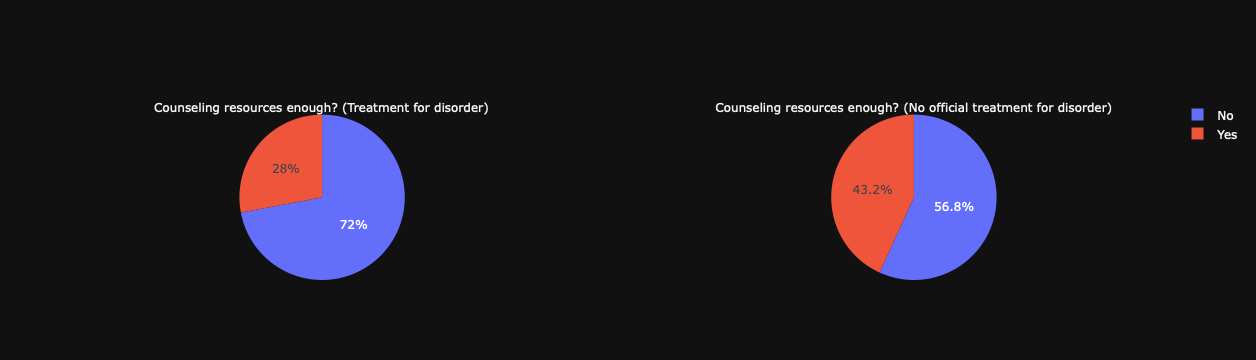

In [74]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])


fig.add_trace(
    go.Pie( 
        values=df_mentallyill['Do you think that the mental health and counseling resources provided by the Sykes Wellness Center are sufficient?'].value_counts().values, 
        labels=df_mentallyill['Do you think that the mental health and counseling resources provided by the Sykes Wellness Center are sufficient?'].value_counts().index, 
        title='Counseling resources enough? (Treatment for disorder)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_notofficiallymentallyill['Do you think that the mental health and counseling resources provided by the Sykes Wellness Center are sufficient?'].value_counts().index,
        values=df_notofficiallymentallyill['Do you think that the mental health and counseling resources provided by the Sykes Wellness Center are sufficient?'].value_counts().values,
        title='Counseling resources enough? (No official treatment for disorder)'
    ),
    row=1, col=2)

# plot(fig)
fig.show()

# Anxiety and Gender Identity

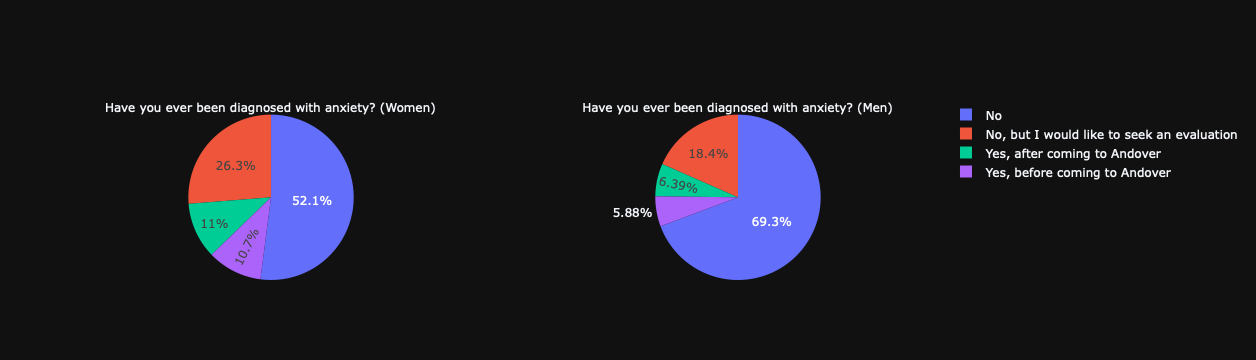

In [75]:
# By gender
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie( 
        values=df_Woman['Have you ever been diagnosed with anxiety?'].value_counts().values, 
        labels=df_Woman['Have you ever been diagnosed with anxiety?'].value_counts().index, 
        title='Have you ever been diagnosed with anxiety? (Women)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_Man['Have you ever been diagnosed with anxiety?'].value_counts().index,
        values=df_Man['Have you ever been diagnosed with anxiety?'].value_counts().values,
        title='Have you ever been diagnosed with anxiety? (Men)'
    ),
    row=1, col=2)

# plot(fig)
fig.show()

In [76]:
df['How many hours do you spend on coursework outside of class each day?'].value_counts()

4 hours             248
3 hours             207
5 hours             161
2 hours              83
6 hours              71
7 hours              25
1 hour or less       19
8 hours              15
10 hours or more     15
9 hours               3
Name: How many hours do you spend on coursework outside of class each day?, dtype: int64

In [77]:
(4*248 + 3*207 + 161*5 + 83*2 + 71*6 + 25*7 + 19*1 + 15*8 + 15*10 + 9*3)/956

3.662133891213389

---
# Sex

# Sex Ed over the years

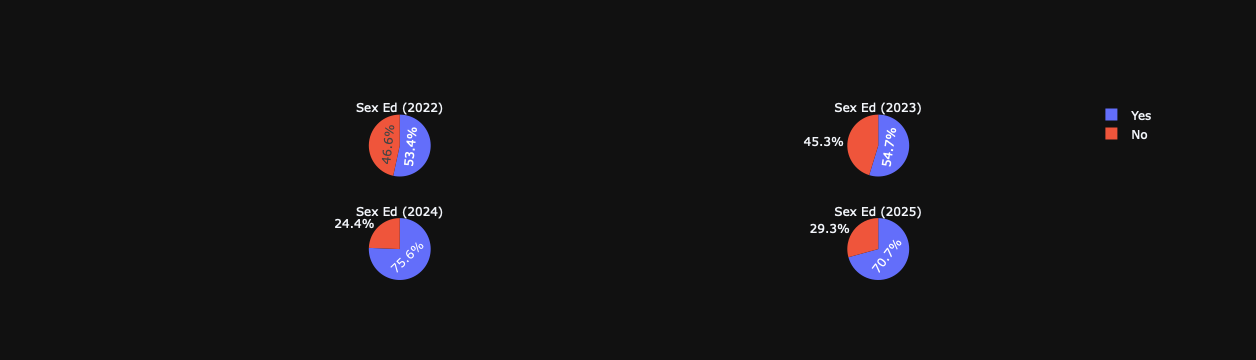

In [78]:
# By class
specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=2, specs=specs)

fig.add_trace(
    go.Pie( 
        values=df_2022['Do you think that your sexual education at Andover has been/is adequate?'].value_counts().values, 
        labels=df_2022['Do you think that your sexual education at Andover has been/is adequate?'].value_counts().index, 
        title='Sex Ed (2022)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_2023['Do you think that your sexual education at Andover has been/is adequate?'].value_counts().index,
        values=df_2023['Do you think that your sexual education at Andover has been/is adequate?'].value_counts().values,
        title='Sex Ed (2023)'
    ),
    row=1, col=2)

fig.add_trace(
    go.Pie( 
        values=df_2024['Do you think that your sexual education at Andover has been/is adequate?'].value_counts().values, 
        labels=df_2024['Do you think that your sexual education at Andover has been/is adequate?'].value_counts().index, 
        title='Sex Ed (2024)'
    ), 
     row=2, col=1)

fig.add_trace(
    go.Pie(
        labels=df_2025['Do you think that your sexual education at Andover has been/is adequate?'].value_counts().index,
        values=df_2025['Do you think that your sexual education at Andover has been/is adequate?'].value_counts().values,
        title='Sex Ed (2025)'
    ),
    row=2, col=2)

# plot(fig)
fig.show()

# Substance consumption and Sex

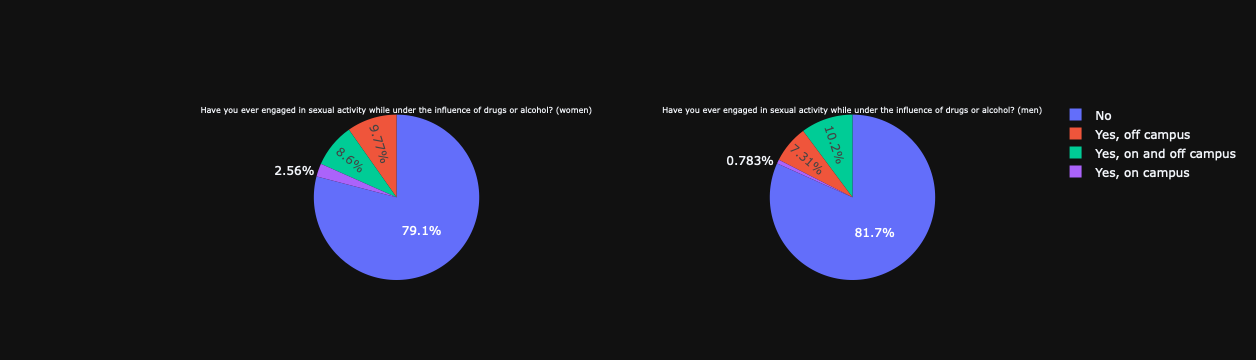

In [79]:
# By gender
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie( 
        values=df_Woman['Have you ever engaged in sexual activity while under the influence of drugs or alcohol?'].value_counts().values, 
        labels=df_Woman['Have you ever engaged in sexual activity while under the influence of drugs or alcohol?'].value_counts().index, 
        title='Have you ever engaged in sexual activity while under the influence of drugs or alcohol? (women)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_Man['Have you ever engaged in sexual activity while under the influence of drugs or alcohol?'].value_counts().index,
        values=df_Man['Have you ever engaged in sexual activity while under the influence of drugs or alcohol?'].value_counts().values,
        title='Have you ever engaged in sexual activity while under the influence of drugs or alcohol? (men)'
    ),
    row=1, col=2)

# plot(fig)
fig.show()

# Rape Culture and Gender Identity

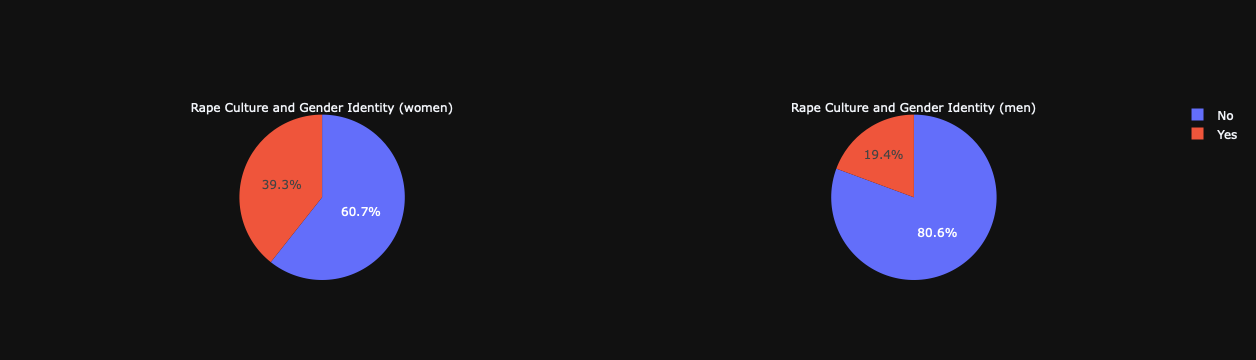

In [80]:
# By gender
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie( 
        values=df_Woman['Do you believe there is rape culture—“a society or environment whose prevailing social attitudes have the effect of normalizing or trivializing sexual assault and abuse” (Oxford English Dictionary)—at Andover?'].value_counts().values, 
        labels=df_Woman['Do you believe there is rape culture—“a society or environment whose prevailing social attitudes have the effect of normalizing or trivializing sexual assault and abuse” (Oxford English Dictionary)—at Andover?'].value_counts().index, 
        title='Rape Culture and Gender Identity (women)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_Man['Do you believe there is rape culture—“a society or environment whose prevailing social attitudes have the effect of normalizing or trivializing sexual assault and abuse” (Oxford English Dictionary)—at Andover?'].value_counts().index,
        values=df_Man['Do you believe there is rape culture—“a society or environment whose prevailing social attitudes have the effect of normalizing or trivializing sexual assault and abuse” (Oxford English Dictionary)—at Andover?'].value_counts().values,
        title='Rape Culture and Gender Identity (men)'
    ),
    row=1, col=2)

# plot(fig)
fig.show()

# Masturbation and Gender Identity

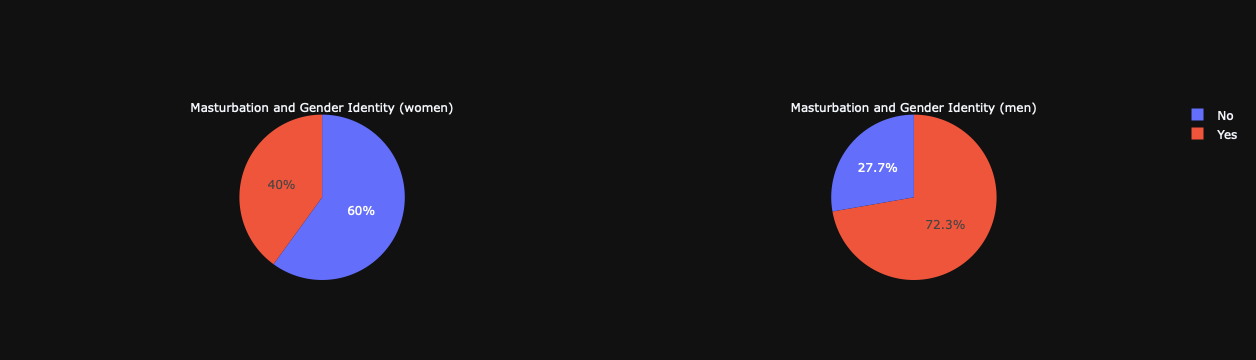

In [81]:
# By gender
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie( 
        values=df_Woman['Would you feel comfortable telling your friends that you masturbate?'].value_counts().values, 
        labels=df_Woman['Would you feel comfortable telling your friends that you masturbate?'].value_counts().index, 
        title='Masturbation and Gender Identity (women)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_Man['Would you feel comfortable telling your friends that you masturbate?'].value_counts().index,
        values=df_Man['Would you feel comfortable telling your friends that you masturbate?'].value_counts().values,
        title='Masturbation and Gender Identity (men)'
    ),
    row=1, col=2)

# plot(fig)
fig.show()

# Peer pressure and Hook Up culture

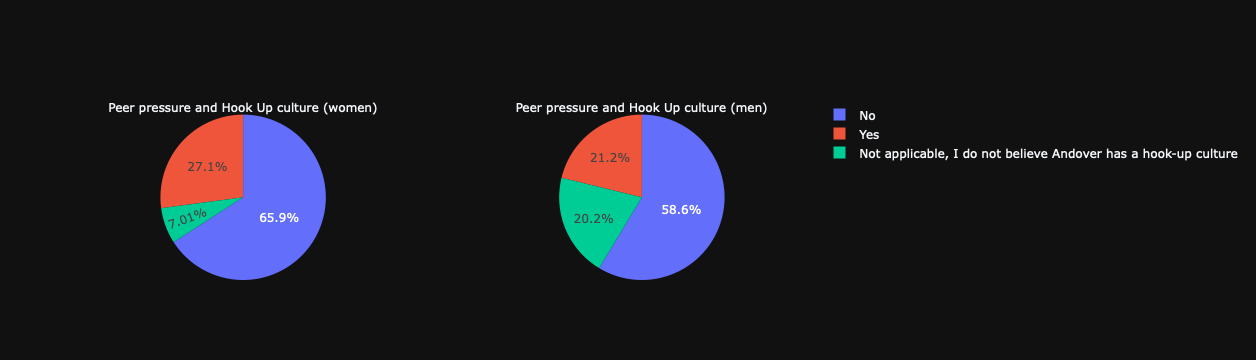

In [82]:
# By gender
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie( 
        values=df_Woman["If yes, have you ever felt pressured by your peers to participate in Andover's hook-up culture?"].value_counts().values, 
        labels=df_Woman["If yes, have you ever felt pressured by your peers to participate in Andover's hook-up culture?"].value_counts().index, 
        title='Peer pressure and Hook Up culture (women)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_Man["If yes, have you ever felt pressured by your peers to participate in Andover's hook-up culture?"].value_counts().index,
        values=df_Man["If yes, have you ever felt pressured by your peers to participate in Andover's hook-up culture?"].value_counts().values,
        title='Peer pressure and Hook Up culture (men)'
    ),
    row=1, col=2)

# plot(fig)
fig.show()

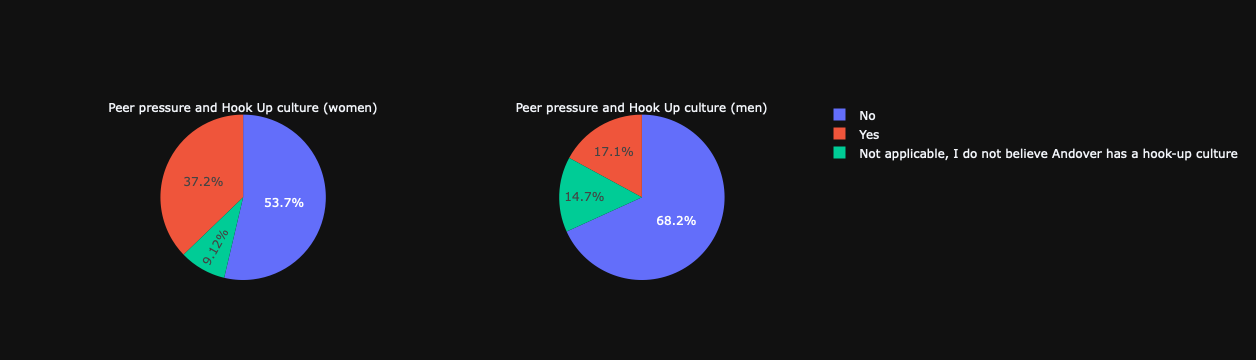

In [83]:
# Have you ever “hooked up” with someone you were not in a committed relationship with?
# If yes, have you ever felt pressured by your peers to participate in Andover's hook-up culture?
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie( 
        values=df_hookup_yes["If yes, have you ever felt pressured by your peers to participate in Andover's hook-up culture?"].value_counts().values, 
        labels=df_hookup_yes["If yes, have you ever felt pressured by your peers to participate in Andover's hook-up culture?"].value_counts().index, 
        title='Peer pressure and Hook Up culture (women)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_hookup_no["If yes, have you ever felt pressured by your peers to participate in Andover's hook-up culture?"].value_counts().index,
        values=df_hookup_no["If yes, have you ever felt pressured by your peers to participate in Andover's hook-up culture?"].value_counts().values,
        title='Peer pressure and Hook Up culture (men)'
    ),
    row=1, col=2)

# plot(fig)
fig.show()

# Hookup vs sexual orientation

In [84]:
sexuality_correlations('Do you believe that there is a hook-up culture at Andover?')

df_bi : 156
Yes    128
No      18
Name: Do you believe that there is a hook-up culture at Andover?, dtype: int64

df_demi : 18
Yes    15
No      1
Name: Do you believe that there is a hook-up culture at Andover?, dtype: int64

df_het : 653
Yes    455
No     134
Name: Do you believe that there is a hook-up culture at Andover?, dtype: int64

df_homo : 47
Yes    37
No      6
Name: Do you believe that there is a hook-up culture at Andover?, dtype: int64

df_pan : 31
Yes    26
No      4
Name: Do you believe that there is a hook-up culture at Andover?, dtype: int64

df_queer : 71
Yes    55
No      8
Name: Do you believe that there is a hook-up culture at Andover?, dtype: int64

df_questioning : 64
Yes    54
No      8
Name: Do you believe that there is a hook-up culture at Andover?, dtype: int64



# Hookup and Gender

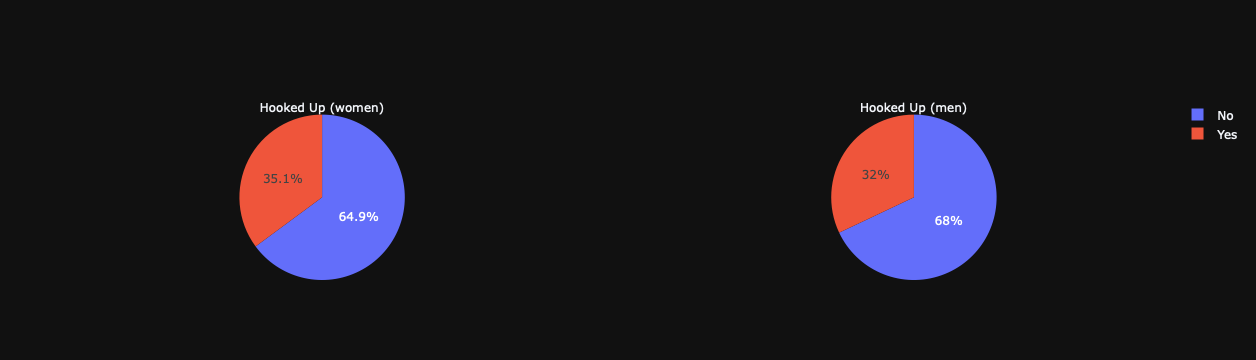

In [85]:
# By gender
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie( 
        values=df_Woman["Have you ever “hooked up” with someone you were not in a committed relationship with?"].value_counts().values, 
        labels=df_Woman["Have you ever “hooked up” with someone you were not in a committed relationship with?"].value_counts().index, 
        title='Hooked Up (women)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_Man["Have you ever “hooked up” with someone you were not in a committed relationship with?"].value_counts().index,
        values=df_Man["Have you ever “hooked up” with someone you were not in a committed relationship with?"].value_counts().values,
        title='Hooked Up (men)'
    ),
    row=1, col=2)

# plot(fig)
fig.show()

# Sex and Class

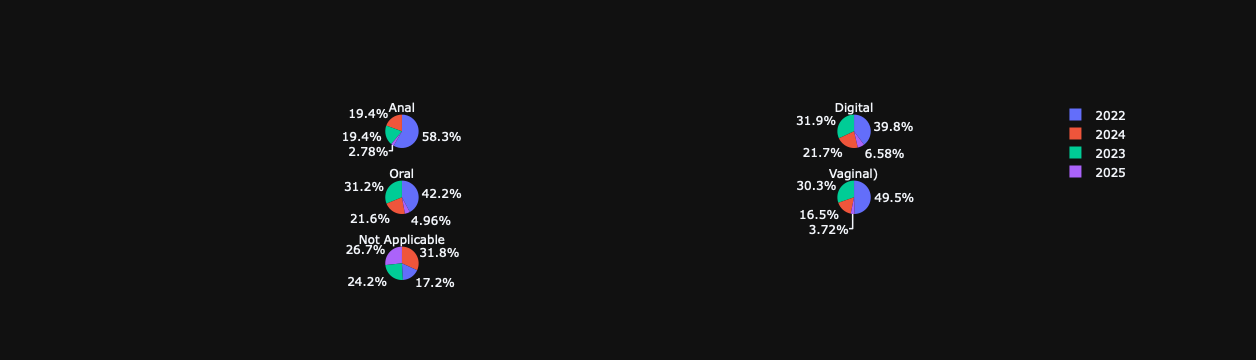

In [86]:
# df_Anal 
# df_Digital
# df_Oral
# df_Vaginal
# df_notApplicable
# What class are you in?

# By class
specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=3, cols=2, specs=specs)

fig.add_trace(
    go.Pie( 
        values=df_Anal['What class are you in?'].value_counts().values, 
        labels=df_Anal['What class are you in?'].value_counts().index, 
        title='Anal'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_Digital['What class are you in?'].value_counts().index,
        values=df_Digital['What class are you in?'].value_counts().values,
        title='Digital'
    ),
    row=1, col=2)

fig.add_trace(
    go.Pie( 
        values=df_Oral['What class are you in?'].value_counts().values, 
        labels=df_Oral['What class are you in?'].value_counts().index, 
        title='Oral'
    ), 
     row=2, col=1)

fig.add_trace(
    go.Pie(
        labels=df_Vaginal['What class are you in?'].value_counts().index,
        values=df_Vaginal['What class are you in?'].value_counts().values,
        title='Vaginal)'
    ),
    row=2, col=2)

fig.add_trace(
    go.Pie(
        labels=df_notApplicable['What class are you in?'].value_counts().index,
        values=df_notApplicable['What class are you in?'].value_counts().values,
        title='Not Applicable'
    ),
    row=3, col=1)

plot(fig)
fig.show()

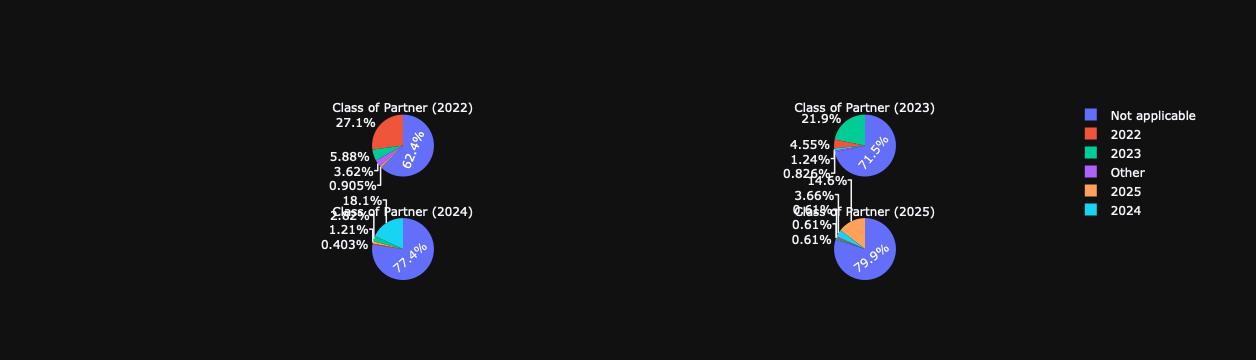

In [87]:
# If you are currently in a committed relationship, what class is your partner in?

specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=2, specs=specs)

fig.add_trace(
    go.Pie( 
        values=df_2022['If you are currently in a committed relationship, what class is your partner in?'].value_counts().values, 
        labels=df_2022['If you are currently in a committed relationship, what class is your partner in?'].value_counts().index, 
        title='Class of Partner (2022)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_2023['If you are currently in a committed relationship, what class is your partner in?'].value_counts().index,
        values=df_2023['If you are currently in a committed relationship, what class is your partner in?'].value_counts().values,
        title='Class of Partner (2023)'
    ),
    row=1, col=2)

fig.add_trace(
    go.Pie( 
        values=df_2024['If you are currently in a committed relationship, what class is your partner in?'].value_counts().values, 
        labels=df_2024['If you are currently in a committed relationship, what class is your partner in?'].value_counts().index, 
        title='Class of Partner (2024)'
    ), 
     row=2, col=1)

fig.add_trace(
    go.Pie(
        labels=df_2025['If you are currently in a committed relationship, what class is your partner in?'].value_counts().index,
        values=df_2025['If you are currently in a committed relationship, what class is your partner in?'].value_counts().values,
        title='Class of Partner (2025)'
    ),
    row=2, col=2)

# plot(fig)
fig.show()

In [88]:
# df_Anal 
# df_Digital
# df_Oral
# df_Vaginal
# df_notApplicable
find_no(df_Anal, df_2022, '2022 and anal')
find_no(df_Anal, df_2023, '2023 and anal')
find_no(df_Anal, df_2024, '2024 and anal')
find_no(df_Anal, df_2025, '2025 and anal')
print()
find_no(df_Digital, df_2022, '2022 and digital')
find_no(df_Digital, df_2023, '2023 and digital')
find_no(df_Digital, df_2024, '2024 and digital')
find_no(df_Digital, df_2025, '2025 and digital')
print()
find_no(df_Oral, df_2022, '2022 and oral')
find_no(df_Oral, df_2023, '2023 and oral')
find_no(df_Oral, df_2024, '2024 and oral')
find_no(df_Oral, df_2025, '2025 and oral')
print()
find_no(df_Vaginal, df_2022, '2022 and vaginal')
find_no(df_Vaginal, df_2023, '2023 and vaginal')
find_no(df_Vaginal, df_2024, '2024 and vaginal')
find_no(df_Vaginal, df_2025, '2025 and vaginal')

2022 and anal: 21 out of 238 , percentage : 8.823529411764707 %
2023 and anal: 7 out of 265 , percentage : 2.6415094339622645 %
2024 and anal: 7 out of 265 , percentage : 2.6415094339622645 %
2025 and anal: 1 out of 184 , percentage : 0.5434782608695652 %

2022 and digital: 121 out of 238 , percentage : 50.84033613445378 %
2023 and digital: 97 out of 265 , percentage : 36.60377358490566 %
2024 and digital: 66 out of 265 , percentage : 24.90566037735849 %
2025 and digital: 20 out of 184 , percentage : 10.869565217391305 %

2022 and oral: 119 out of 238 , percentage : 50.0 %
2023 and oral: 88 out of 265 , percentage : 33.20754716981132 %
2024 and oral: 61 out of 265 , percentage : 23.0188679245283 %
2025 and oral: 14 out of 184 , percentage : 7.608695652173914 %

2022 and vaginal: 93 out of 238 , percentage : 39.075630252100844 %
2023 and vaginal: 57 out of 265 , percentage : 21.50943396226415 %
2024 and vaginal: 31 out of 265 , percentage : 11.69811320754717 %
2025 and vaginal: 7 out of

# Sexuality and Frequency of Sex

In [89]:
sexuality_correlations('How frequently, on average, do you engage in sexual activity?')

df_bi : 156
Not applicable, I have never engaged in sexual activity    80
Several times a week                                       16
Weekly                                                     16
Several times a year                                       15
About once per month                                       10
Once a year or less                                         9
Name: How frequently, on average, do you engage in sexual activity?, dtype: int64

df_demi : 18
Not applicable, I have never engaged in sexual activity    11
Several times a year                                        2
Weekly                                                      2
Several times a week                                        1
Once a year or less                                         1
Name: How frequently, on average, do you engage in sexual activity?, dtype: int64

df_het : 653
Not applicable, I have never engaged in sexual activity    348
Weekly                                             

---
# Drugs and Alc

# Drugs by Class

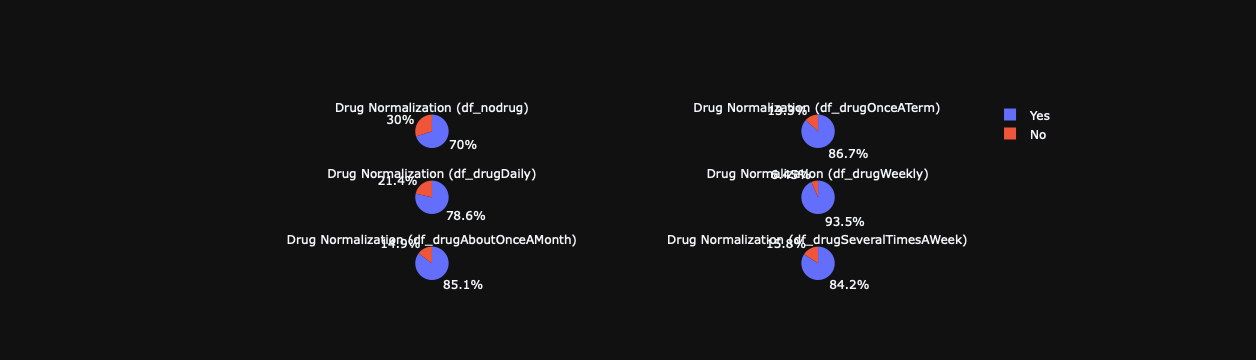

In [128]:
specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=2, specs=specs)

fig.add_trace(
    go.Pie( 
        values=df_2022['How often do you consume recreational drugs or alcohol on campus?'].value_counts().values, 
        labels=df_2022['How often do you consume recreational drugs or alcohol on campus?'].value_counts().index, 
        title='Drug Use (2022)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_2023['How often do you consume recreational drugs or alcohol on campus?'].value_counts().index,
        values=df_2023['How often do you consume recreational drugs or alcohol on campus?'].value_counts().values,
        title='Drug Use (2023)'
    ),
    row=1, col=2)

fig.add_trace(
    go.Pie( 
        values=df_2024['How often do you consume recreational drugs or alcohol on campus?'].value_counts().values, 
        labels=df_2024['How often do you consume recreational drugs or alcohol on campus?'].value_counts().index, 
        title='Drug Use (2024)'
    ), 
     row=2, col=1)

fig.add_trace(
    go.Pie(
        labels=df_2025['How often do you consume recreational drugs or alcohol on campus?'].value_counts().index,
        values=df_2025['How often do you consume recreational drugs or alcohol on campus?'].value_counts().values,
        title='Drug Use (2025)'
    ),
    row=2, col=2)

# plot(fig)
fig.show()

# Normalization of drug vs drugs freq

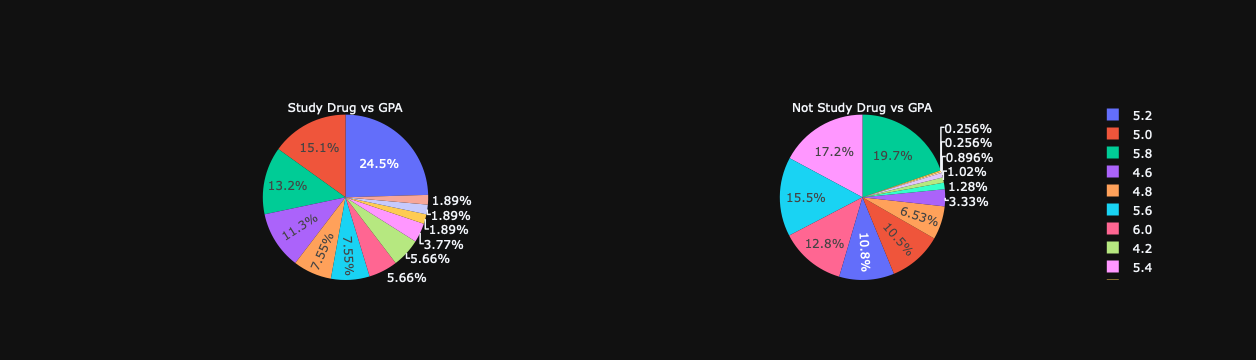

In [90]:
# df_nodrug
# df_drugOnceATerm
# df_drugDaily
# df_drugWeekly
# df_drugAboutOnceAMonth 
# df_drugSeveralTimesAWeek

specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}],[{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=3, cols=2, specs=specs)


fig.add_trace(
    go.Pie( 
        values=df_nodrug['Do you think that the use of recreational drugs or alcohol is normalized at Andover?'].value_counts().values,
        labels=df_nodrug['Do you think that the use of recreational drugs or alcohol is normalized at Andover?'].value_counts().index,
        title='Drug Normalization (df_nodrug)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_drugOnceATerm['Do you think that the use of recreational drugs or alcohol is normalized at Andover?'].value_counts().index,
        values=df_drugOnceATerm['Do you think that the use of recreational drugs or alcohol is normalized at Andover?'].value_counts().values,
        title='Drug Normalization (df_drugOnceATerm)'
    ),
    row=1, col=2)

fig.add_trace(
    go.Pie( 
        values=df_drugDaily['Do you think that the use of recreational drugs or alcohol is normalized at Andover?'].value_counts().values,
        labels=df_drugDaily['Do you think that the use of recreational drugs or alcohol is normalized at Andover?'].value_counts().index,
        title='Drug Normalization (df_drugDaily)'
    ), 
     row=2, col=1)

fig.add_trace(
    go.Pie(
        labels=df_drugWeekly['Do you think that the use of recreational drugs or alcohol is normalized at Andover?'].value_counts().index,
        values=df_drugWeekly['Do you think that the use of recreational drugs or alcohol is normalized at Andover?'].value_counts().values,
        title='Drug Normalization (df_drugWeekly)'
    ),
    row=2, col=2)

fig.add_trace(
    go.Pie( 
        values=df_drugAboutOnceAMonth['Do you think that the use of recreational drugs or alcohol is normalized at Andover?'].value_counts().values,
        labels=df_drugAboutOnceAMonth['Do you think that the use of recreational drugs or alcohol is normalized at Andover?'].value_counts().index,
        title='Drug Normalization (df_drugAboutOnceAMonth)'
    ), 
     row=3, col=1)

fig.add_trace(
    go.Pie(
        labels=df_drugSeveralTimesAWeek['Do you think that the use of recreational drugs or alcohol is normalized at Andover?'].value_counts().index,
        values=df_drugSeveralTimesAWeek['Do you think that the use of recreational drugs or alcohol is normalized at Andover?'].value_counts().values,
        title='Drug Normalization (df_drugSeveralTimesAWeek)'
    ),
    row=3, col=2)

plot(fig)
fig.show()

# Study Drugs vs GPA

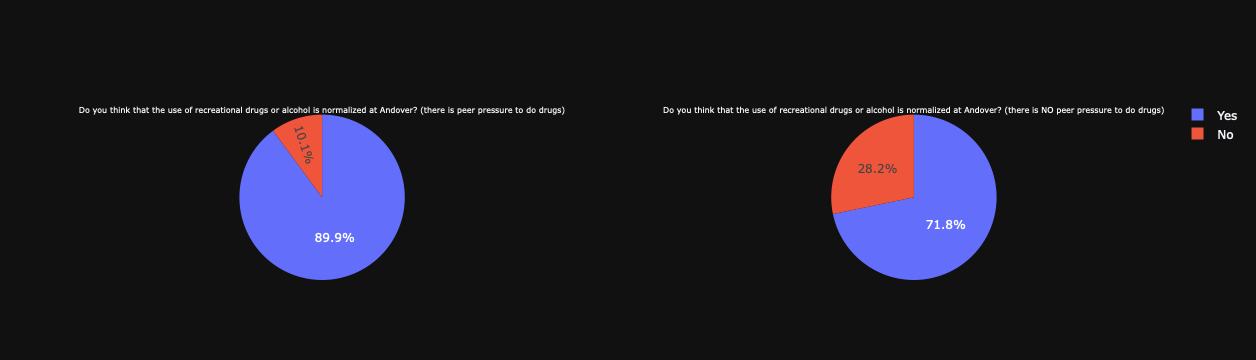

In [91]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie( 
        values=df_yesstudydrug['What was your rounded Winter 2021-2022 G.P.A.? (If you are between two numbers, round up to the closest decimal – a 5.3 G.P.A. would round to a 5.4. If you earned a Pass or multiple Passes, exclude this from your calculation.)'].value_counts().values, 
        labels=df_yesstudydrug['What was your rounded Winter 2021-2022 G.P.A.? (If you are between two numbers, round up to the closest decimal – a 5.3 G.P.A. would round to a 5.4. If you earned a Pass or multiple Passes, exclude this from your calculation.)'].value_counts().index, 
        title='Study Drug vs GPA'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_nostudydrug['What was your rounded Winter 2021-2022 G.P.A.? (If you are between two numbers, round up to the closest decimal – a 5.3 G.P.A. would round to a 5.4. If you earned a Pass or multiple Passes, exclude this from your calculation.)'].value_counts().index,
        values=df_nostudydrug['What was your rounded Winter 2021-2022 G.P.A.? (If you are between two numbers, round up to the closest decimal – a 5.3 G.P.A. would round to a 5.4. If you earned a Pass or multiple Passes, exclude this from your calculation.)'].value_counts().values,
        title='Not Study Drug vs GPA'
    ),
    row=1, col=2)

# plot(fig)
fig.show()

# Pressure to do Drugs + Normalization

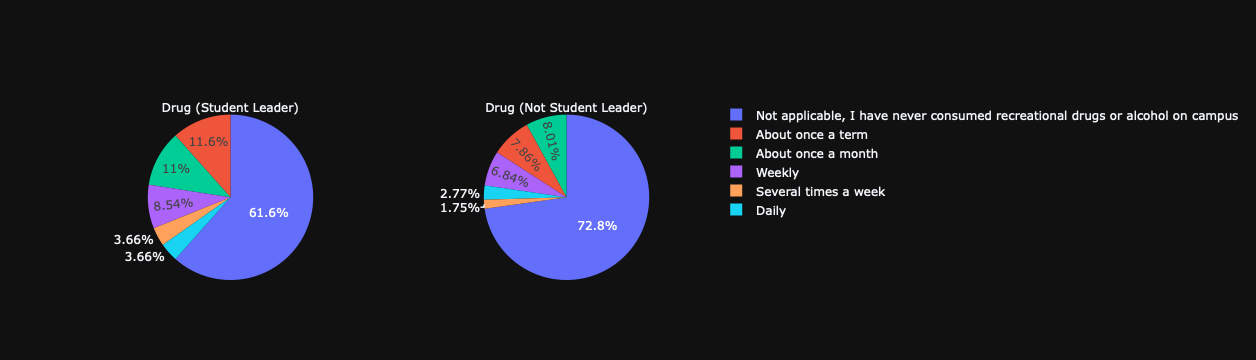

In [92]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie( 
        values=df_pressuredfordrugs['Do you think that the use of recreational drugs or alcohol is normalized at Andover?'].value_counts().values,
        labels=df_pressuredfordrugs['Do you think that the use of recreational drugs or alcohol is normalized at Andover?'].value_counts().index,
        title='Do you think that the use of recreational drugs or alcohol is normalized at Andover? (there is peer pressure to do drugs)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_notpressuredfordrugs['Do you think that the use of recreational drugs or alcohol is normalized at Andover?'].value_counts().index,
        values=df_notpressuredfordrugs['Do you think that the use of recreational drugs or alcohol is normalized at Andover?'].value_counts().values,
        title='Do you think that the use of recreational drugs or alcohol is normalized at Andover? (there is NO peer pressure to do drugs)'
    ),
    row=1, col=2)

fig.show()

# Leadership and drugs

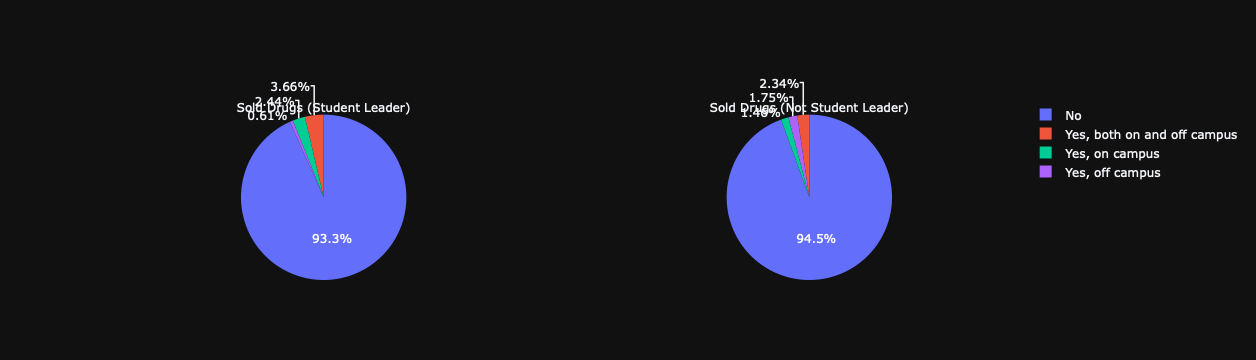

In [94]:
#sell drugs

specs = [[{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=1, cols=2, specs=specs)

fig.add_trace(
    go.Pie( 
        values=df_leader['Have you ever sold someone recreational drugs, alcohol, or your prescription medication? '].value_counts().values,
        labels=df_leader['Have you ever sold someone recreational drugs, alcohol, or your prescription medication? '].value_counts().index,
        title='Sold Drugs (Student Leader)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_noleader['Have you ever sold someone recreational drugs, alcohol, or your prescription medication? '].value_counts().index,
        values=df_noleader['Have you ever sold someone recreational drugs, alcohol, or your prescription medication? '].value_counts().values,
        title='Sold Drugs (Not Student Leader)'
    ),
    row=1, col=2)

# plot(fig)
fig.show()

# Fake id and Drug Use

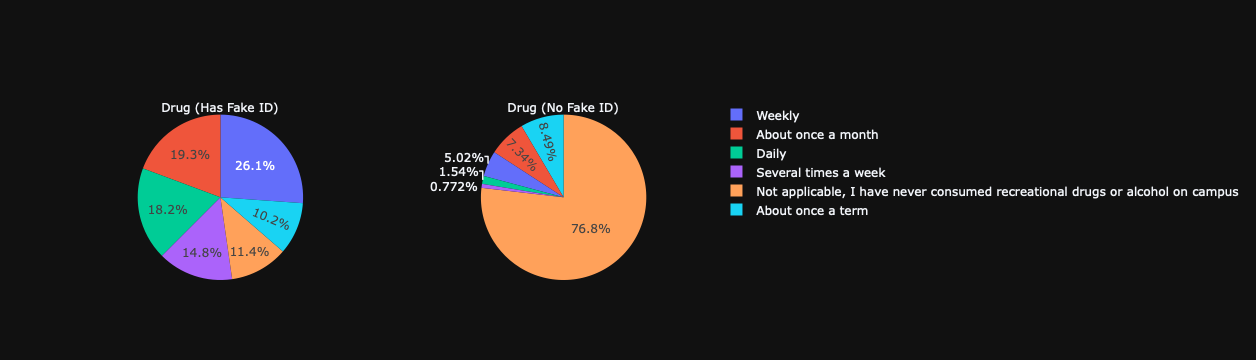

In [95]:
specs = [[{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=1, cols=2, specs=specs)

fig.add_trace(
    go.Pie( 
        values=df_hasfakeid['How often do you consume recreational drugs or alcohol on campus?'].value_counts().values,
        labels=df_hasfakeid['How often do you consume recreational drugs or alcohol on campus?'].value_counts().index,
        title='Drug (Has Fake ID)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_nofakeid['How often do you consume recreational drugs or alcohol on campus?'].value_counts().index,
        values=df_nofakeid['How often do you consume recreational drugs or alcohol on campus?'].value_counts().values,
        title='Drug (No Fake ID)'
    ),
    row=1, col=2)

# plot(fig)
fig.show()

---

# School

# GPA and Gender

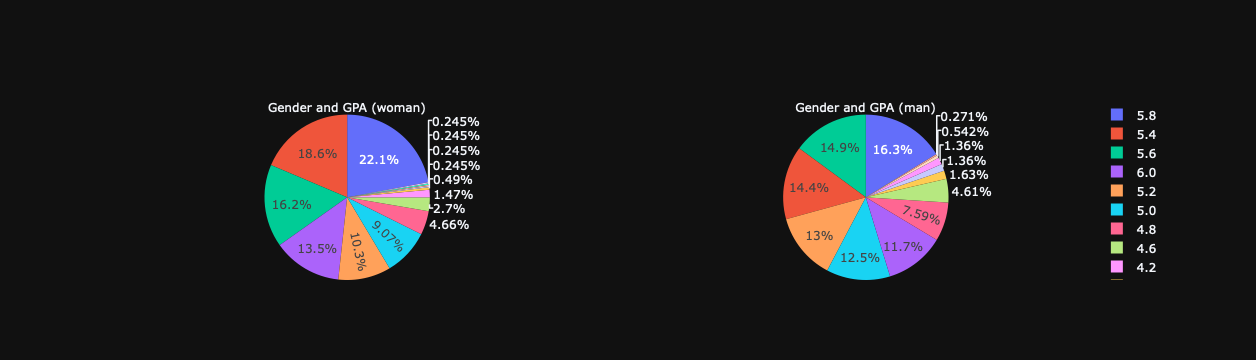

In [96]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie( 
        values=df_Woman['What was your rounded Winter 2021-2022 G.P.A.? (If you are between two numbers, round up to the closest decimal – a 5.3 G.P.A. would round to a 5.4. If you earned a Pass or multiple Passes, exclude this from your calculation.)'].value_counts().values, 
        labels=df_Woman['What was your rounded Winter 2021-2022 G.P.A.? (If you are between two numbers, round up to the closest decimal – a 5.3 G.P.A. would round to a 5.4. If you earned a Pass or multiple Passes, exclude this from your calculation.)'].value_counts().index, 
        title='Gender and GPA (woman)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_Man['What was your rounded Winter 2021-2022 G.P.A.? (If you are between two numbers, round up to the closest decimal – a 5.3 G.P.A. would round to a 5.4. If you earned a Pass or multiple Passes, exclude this from your calculation.)'].value_counts().index,
        values=df_Man['What was your rounded Winter 2021-2022 G.P.A.? (If you are between two numbers, round up to the closest decimal – a 5.3 G.P.A. would round to a 5.4. If you earned a Pass or multiple Passes, exclude this from your calculation.)'].value_counts().values,
        title='Gender and GPA (man)'
    ),
    row=1, col=2)

# plot(fig)
fig.show()

# GPA and Varsity

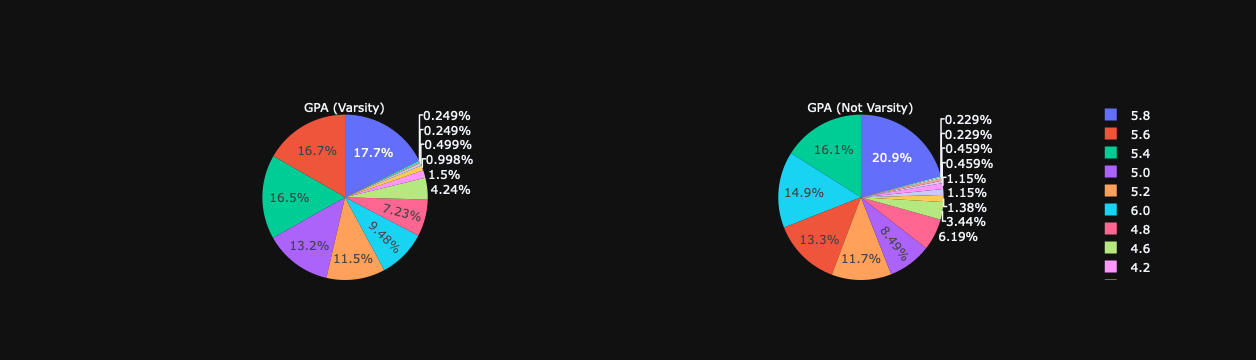

In [97]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie( 
        values=df_varsity['What was your rounded Winter 2021-2022 G.P.A.? (If you are between two numbers, round up to the closest decimal – a 5.3 G.P.A. would round to a 5.4. If you earned a Pass or multiple Passes, exclude this from your calculation.)'].value_counts().values, 
        labels=df_varsity['What was your rounded Winter 2021-2022 G.P.A.? (If you are between two numbers, round up to the closest decimal – a 5.3 G.P.A. would round to a 5.4. If you earned a Pass or multiple Passes, exclude this from your calculation.)'].value_counts().index, 
        title='GPA (Varsity)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_novarsity['What was your rounded Winter 2021-2022 G.P.A.? (If you are between two numbers, round up to the closest decimal – a 5.3 G.P.A. would round to a 5.4. If you earned a Pass or multiple Passes, exclude this from your calculation.)'].value_counts().index,
        values=df_novarsity['What was your rounded Winter 2021-2022 G.P.A.? (If you are between two numbers, round up to the closest decimal – a 5.3 G.P.A. would round to a 5.4. If you earned a Pass or multiple Passes, exclude this from your calculation.)'].value_counts().values,
        title='GPA (Not Varsity)'
    ),
    row=1, col=2)

# plot(fig)
fig.show()

# Considering Leaving vs Year

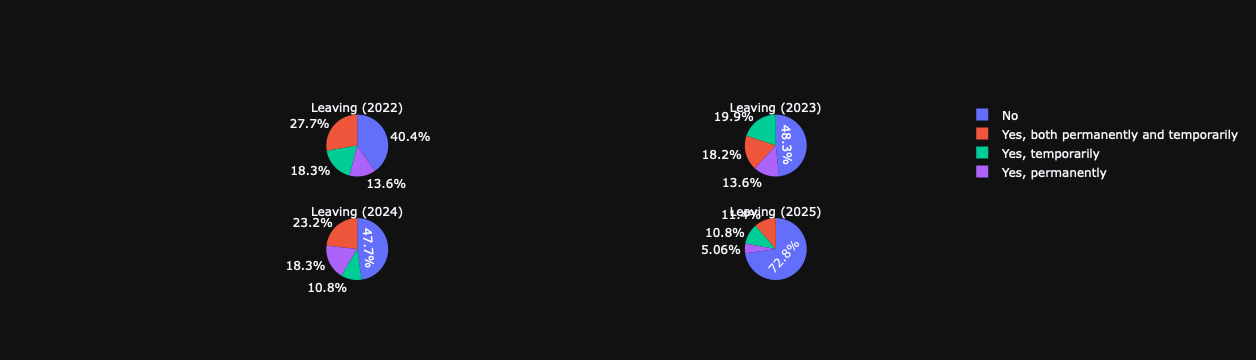

In [98]:
specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=2, specs=specs)

fig.add_trace(
    go.Pie( 
        values=df_2022['Have you ever considered leaving Andover permanently or temporarily?'].value_counts().values, 
        labels=df_2022['Have you ever considered leaving Andover permanently or temporarily?'].value_counts().index, 
        title='Leaving (2022)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_2023['Have you ever considered leaving Andover permanently or temporarily?'].value_counts().index,
        values=df_2023['Have you ever considered leaving Andover permanently or temporarily?'].value_counts().values,
        title='Leaving (2023)'
    ),
    row=1, col=2)

fig.add_trace(
    go.Pie( 
        values=df_2024['Have you ever considered leaving Andover permanently or temporarily?'].value_counts().values, 
        labels=df_2024['Have you ever considered leaving Andover permanently or temporarily?'].value_counts().index, 
        title='Leaving (2024)'
    ), 
     row=2, col=1)

fig.add_trace(
    go.Pie(
        labels=df_2025['Have you ever considered leaving Andover permanently or temporarily?'].value_counts().index,
        values=df_2025['Have you ever considered leaving Andover permanently or temporarily?'].value_counts().values,
        title='Leaving (2025)'
    ),
    row=2, col=2)

# plot(fig)
fig.show()

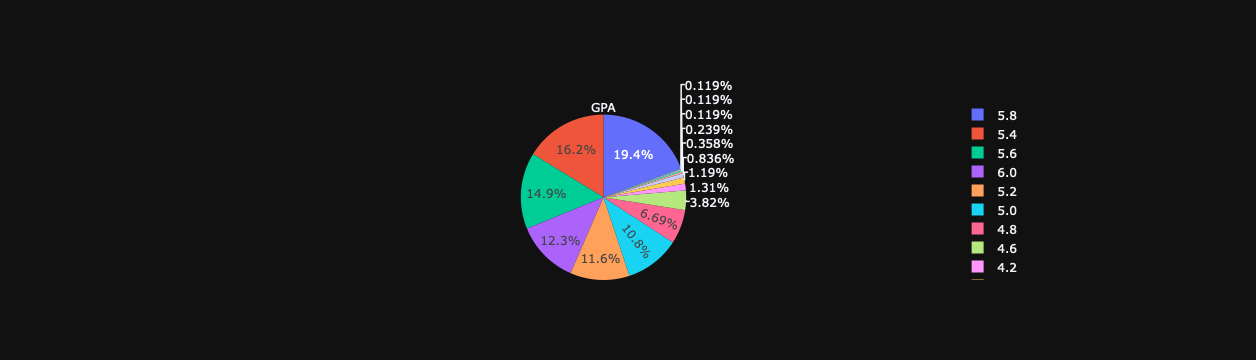

In [99]:
# import math
# responses = 0
# sumGPA = 0

# for each in df['What was your rounded Winter 2021-2022 G.P.A.? (If you are between two numbers, round up to the closest decimal – a 5.3 G.P.A. would round to a 5.4. If you earned a Pass or multiple Passes, exclude this from your calculation.)']:
#     if each != 'Response':
#         if each == '2.0 or below':
#             sumGPA += (2.0)
# #             print(each)
#         elif not math.isnan(float(each)):
#             sumGPA += float(each)
#             print(sumGPA)
#         responses+=1

# sumGPA

fig = make_subplots(rows=1, cols=1, specs=[[{"type": "pie"}]])

fig.add_trace(
    go.Pie( 
        values=df['What was your rounded Winter 2021-2022 G.P.A.? (If you are between two numbers, round up to the closest decimal – a 5.3 G.P.A. would round to a 5.4. If you earned a Pass or multiple Passes, exclude this from your calculation.)'].value_counts().values, 
        labels=df['What was your rounded Winter 2021-2022 G.P.A.? (If you are between two numbers, round up to the closest decimal – a 5.3 G.P.A. would round to a 5.4. If you earned a Pass or multiple Passes, exclude this from your calculation.)'].value_counts().index, 
        title='GPA'
    ), 
     row=1, col=1)

# plot(fig)
fig.show()

# Andover Affecting College by Year

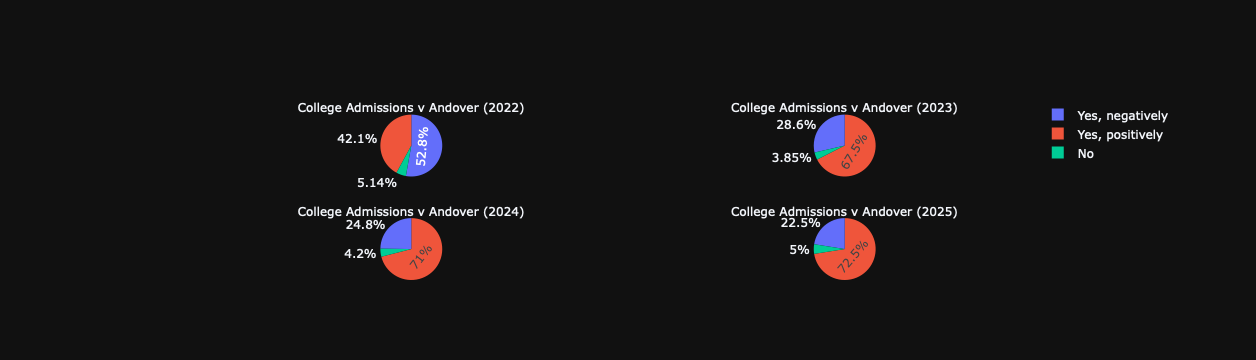

In [100]:
specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=2, specs=specs)

fig.add_trace(
    go.Pie( 
        values=df_2022['Do you think attending Andover affects your chances of attending a selective college?'].value_counts().values, 
        labels=df_2022['Do you think attending Andover affects your chances of attending a selective college?'].value_counts().index, 
        title='College Admissions v Andover (2022)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_2023['Do you think attending Andover affects your chances of attending a selective college?'].value_counts().index,
        values=df_2023['Do you think attending Andover affects your chances of attending a selective college?'].value_counts().values,
        title='College Admissions v Andover (2023)'
    ),
    row=1, col=2)

fig.add_trace(
    go.Pie( 
        values=df_2024['Do you think attending Andover affects your chances of attending a selective college?'].value_counts().values, 
        labels=df_2024['Do you think attending Andover affects your chances of attending a selective college?'].value_counts().index, 
        title='College Admissions v Andover (2024)'
    ), 
     row=2, col=1)

fig.add_trace(
    go.Pie(
        labels=df_2025['Do you think attending Andover affects your chances of attending a selective college?'].value_counts().index,
        values=df_2025['Do you think attending Andover affects your chances of attending a selective college?'].value_counts().values,
        title='College Admissions v Andover (2025)'
    ),
    row=2, col=2)

# plot(fig)
fig.show()

# Accomodations vs Learning Disability

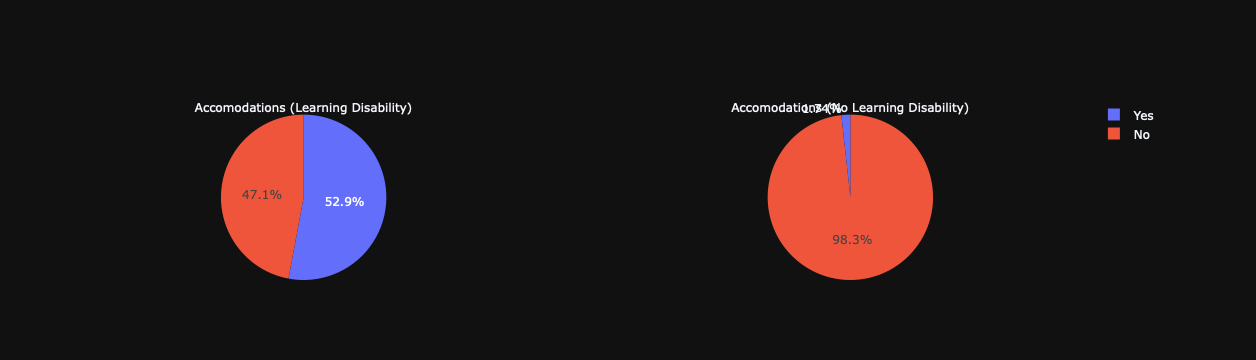

In [101]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie( 
        values=df_haslearningdisability['Do you currently have learning accommodations at Andover?'].value_counts().values, 
        labels=df_haslearningdisability['Do you currently have learning accommodations at Andover?'].value_counts().index, 
        title='Accomodations (Learning Disability)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_nolearningdisability['Do you currently have learning accommodations at Andover?'].value_counts().index,
        values=df_nolearningdisability['Do you currently have learning accommodations at Andover?'].value_counts().values,
        title='Accomodations (No Learning Disability)'
    ),
    row=1, col=2)

# plot(fig)
fig.show()

---
# Campus Culture

# Andover fossil fuel divestment and political affiliation

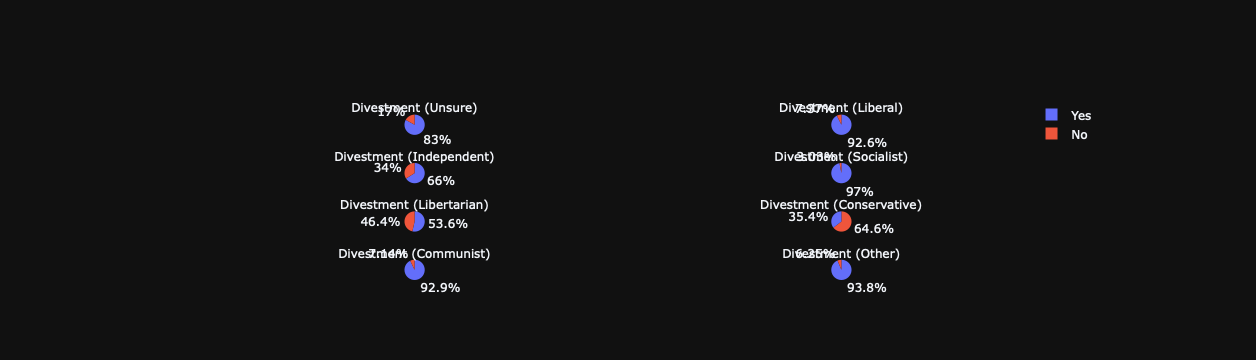

In [102]:
specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}],[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=4, cols=2, specs=specs)


fig.add_trace(
    go.Pie( 
        values=df_Unsure['Do you believe that Andover should divest from fossil fuel companies? Divestment is the act of "taking money away from where you have invested it" (Oxford English Dictionary).'].value_counts().values,
        labels=df_Unsure['Do you believe that Andover should divest from fossil fuel companies? Divestment is the act of "taking money away from where you have invested it" (Oxford English Dictionary).'].value_counts().index,
        title='Divestment (Unsure)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_Liberal['Do you believe that Andover should divest from fossil fuel companies? Divestment is the act of "taking money away from where you have invested it" (Oxford English Dictionary).'].value_counts().index,
        values=df_Liberal['Do you believe that Andover should divest from fossil fuel companies? Divestment is the act of "taking money away from where you have invested it" (Oxford English Dictionary).'].value_counts().values,
        title='Divestment (Liberal)'
    ),
    row=1, col=2)

fig.add_trace(
    go.Pie( 
        values=df_Independent['Do you believe that Andover should divest from fossil fuel companies? Divestment is the act of "taking money away from where you have invested it" (Oxford English Dictionary).'].value_counts().values,
        labels=df_Independent['Do you believe that Andover should divest from fossil fuel companies? Divestment is the act of "taking money away from where you have invested it" (Oxford English Dictionary).'].value_counts().index,
        title='Divestment (Independent)'
    ), 
     row=2, col=1)

fig.add_trace(
    go.Pie(
        labels=df_Socialist['Do you believe that Andover should divest from fossil fuel companies? Divestment is the act of "taking money away from where you have invested it" (Oxford English Dictionary).'].value_counts().index,
        values=df_Socialist['Do you believe that Andover should divest from fossil fuel companies? Divestment is the act of "taking money away from where you have invested it" (Oxford English Dictionary).'].value_counts().values,
        title='Divestment (Socialist)'
    ),
    row=2, col=2)

fig.add_trace(
    go.Pie( 
        values=df_Libertarian['Do you believe that Andover should divest from fossil fuel companies? Divestment is the act of "taking money away from where you have invested it" (Oxford English Dictionary).'].value_counts().values,
        labels=df_Libertarian['Do you believe that Andover should divest from fossil fuel companies? Divestment is the act of "taking money away from where you have invested it" (Oxford English Dictionary).'].value_counts().index,
        title='Divestment (Libertarian)'
    ), 
     row=3, col=1)

fig.add_trace(
    go.Pie(
        labels=df_Conservative['Do you believe that Andover should divest from fossil fuel companies? Divestment is the act of "taking money away from where you have invested it" (Oxford English Dictionary).'].value_counts().index,
        values=df_Conservative['Do you believe that Andover should divest from fossil fuel companies? Divestment is the act of "taking money away from where you have invested it" (Oxford English Dictionary).'].value_counts().values,
        title='Divestment (Conservative)'
    ),
    row=3, col=2)

fig.add_trace(
    go.Pie( 
        values=df_Communist['Do you believe that Andover should divest from fossil fuel companies? Divestment is the act of "taking money away from where you have invested it" (Oxford English Dictionary).'].value_counts().values,
        labels=df_Communist['Do you believe that Andover should divest from fossil fuel companies? Divestment is the act of "taking money away from where you have invested it" (Oxford English Dictionary).'].value_counts().index,
        title='Divestment (Communist)'
    ), 
     row=4, col=1)

fig.add_trace(
    go.Pie(
        labels=df_Other['Do you believe that Andover should divest from fossil fuel companies? Divestment is the act of "taking money away from where you have invested it" (Oxford English Dictionary).'].value_counts().index,
        values=df_Other['Do you believe that Andover should divest from fossil fuel companies? Divestment is the act of "taking money away from where you have invested it" (Oxford English Dictionary).'].value_counts().values,
        title='Divestment (Other)'
    ),
    row=4, col=2)

plot(fig)
fig.show()

# Ideological Diversity and Political Orientationa

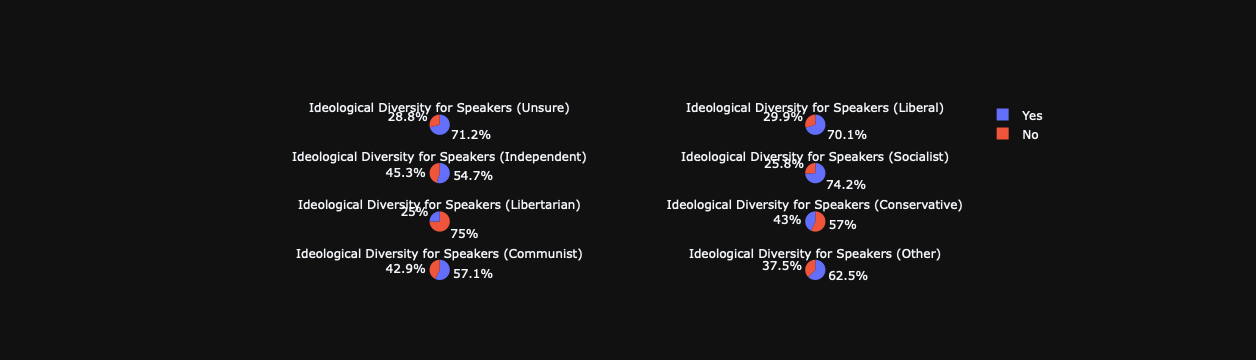

In [103]:
specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}],[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=4, cols=2, specs=specs)


fig.add_trace(
    go.Pie( 
        values=df_Unsure['Do you think the school promotes ideological diversity in its selection of speakers?'].value_counts().values,
        labels=df_Unsure['Do you think the school promotes ideological diversity in its selection of speakers?'].value_counts().index,
        title='Ideological Diversity for Speakers (Unsure)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_Liberal['Do you think the school promotes ideological diversity in its selection of speakers?'].value_counts().index,
        values=df_Liberal['Do you think the school promotes ideological diversity in its selection of speakers?'].value_counts().values,
        title='Ideological Diversity for Speakers (Liberal)'
    ),
    row=1, col=2)

fig.add_trace(
    go.Pie( 
        values=df_Independent['Do you think the school promotes ideological diversity in its selection of speakers?'].value_counts().values,
        labels=df_Independent['Do you think the school promotes ideological diversity in its selection of speakers?'].value_counts().index,
        title='Ideological Diversity for Speakers (Independent)'
    ), 
     row=2, col=1)

fig.add_trace(
    go.Pie(
        labels=df_Socialist['Do you think the school promotes ideological diversity in its selection of speakers?'].value_counts().index,
        values=df_Socialist['Do you think the school promotes ideological diversity in its selection of speakers?'].value_counts().values,
        title='Ideological Diversity for Speakers (Socialist)'
    ),
    row=2, col=2)

fig.add_trace(
    go.Pie( 
        values=df_Libertarian['Do you think the school promotes ideological diversity in its selection of speakers?'].value_counts().values,
        labels=df_Libertarian['Do you think the school promotes ideological diversity in its selection of speakers?'].value_counts().index,
        title='Ideological Diversity for Speakers (Libertarian)'
    ), 
     row=3, col=1)

fig.add_trace(
    go.Pie(
        labels=df_Conservative['Do you think the school promotes ideological diversity in its selection of speakers?'].value_counts().index,
        values=df_Conservative['Do you think the school promotes ideological diversity in its selection of speakers?'].value_counts().values,
        title='Ideological Diversity for Speakers (Conservative)'
    ),
    row=3, col=2)

fig.add_trace(
    go.Pie( 
        values=df_Communist['Do you think the school promotes ideological diversity in its selection of speakers?'].value_counts().values,
        labels=df_Communist['Do you think the school promotes ideological diversity in its selection of speakers?'].value_counts().index,
        title='Ideological Diversity for Speakers (Communist)'
    ), 
     row=4, col=1)

fig.add_trace(
    go.Pie(
        labels=df_Other['Do you think the school promotes ideological diversity in its selection of speakers?'].value_counts().index,
        values=df_Other['Do you think the school promotes ideological diversity in its selection of speakers?'].value_counts().values,
        title='Ideological Diversity for Speakers (Other)'
    ),
    row=4, col=2)

plot(fig)
fig.show()

# Anti Racism Work v Class

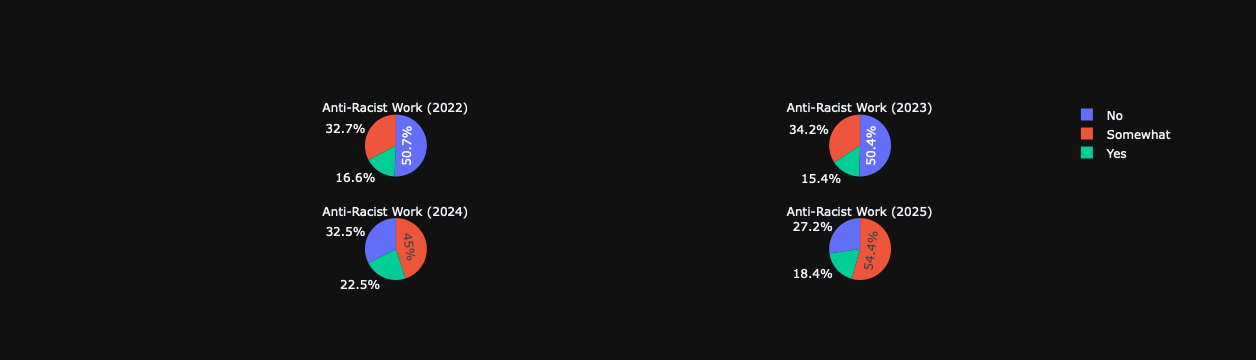

In [104]:
specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=2, specs=specs)

fig.add_trace(
    go.Pie( 
        values=df_2022['Do you think Andover’s anti-racist work is sufficient?'].value_counts().values, 
        labels=df_2022['Do you think Andover’s anti-racist work is sufficient?'].value_counts().index, 
        title='Anti-Racist Work (2022)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_2023['Do you think Andover’s anti-racist work is sufficient?'].value_counts().index,
        values=df_2023['Do you think Andover’s anti-racist work is sufficient?'].value_counts().values,
        title='Anti-Racist Work (2023)'
    ),
    row=1, col=2)

fig.add_trace(
    go.Pie( 
        values=df_2024['Do you think Andover’s anti-racist work is sufficient?'].value_counts().values, 
        labels=df_2024['Do you think Andover’s anti-racist work is sufficient?'].value_counts().index, 
        title='Anti-Racist Work (2024)'
    ), 
     row=2, col=1)

fig.add_trace(
    go.Pie(
        labels=df_2025['Do you think Andover’s anti-racist work is sufficient?'].value_counts().index,
        values=df_2025['Do you think Andover’s anti-racist work is sufficient?'].value_counts().values,
        title='Anti-Racist Work (2025)'
    ),
    row=2, col=2)

# plot(fig)
fig.show()

# Anti Racism Work v Political Orientation

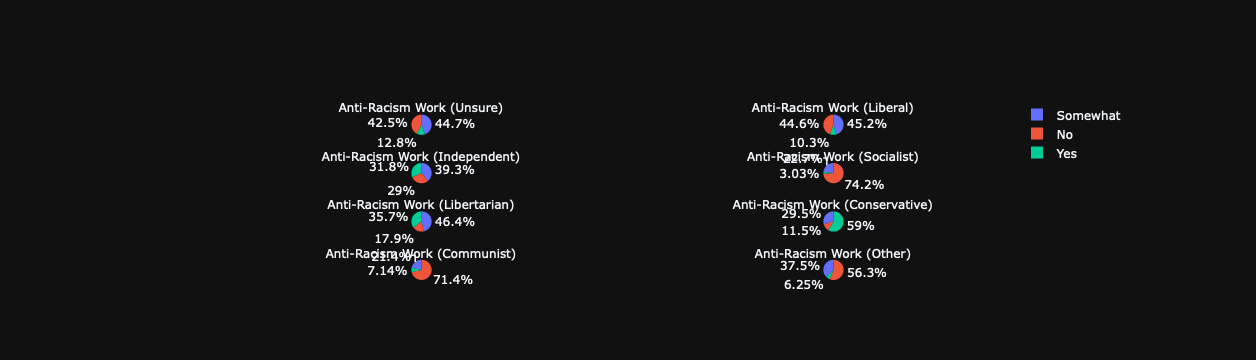

In [105]:
specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}],[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=4, cols=2, specs=specs)


fig.add_trace(
    go.Pie( 
        values=df_Unsure['Do you think Andover’s anti-racist work is sufficient?'].value_counts().values, 
        labels=df_Unsure['Do you think Andover’s anti-racist work is sufficient?'].value_counts().index, 
        title='Anti-Racism Work (Unsure)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        values=df_Liberal['Do you think Andover’s anti-racist work is sufficient?'].value_counts().values, 
        labels=df_Liberal['Do you think Andover’s anti-racist work is sufficient?'].value_counts().index, 
        title='Anti-Racism Work (Liberal)'
    ),
    row=1, col=2)

fig.add_trace(
    go.Pie( 
        values=df_Independent['Do you think Andover’s anti-racist work is sufficient?'].value_counts().values, 
        labels=df_Independent['Do you think Andover’s anti-racist work is sufficient?'].value_counts().index, 
        title='Anti-Racism Work (Independent)'
    ), 
     row=2, col=1)

fig.add_trace(
    go.Pie(
        values=df_Socialist['Do you think Andover’s anti-racist work is sufficient?'].value_counts().values, 
        labels=df_Socialist['Do you think Andover’s anti-racist work is sufficient?'].value_counts().index, 
        title='Anti-Racism Work (Socialist)'
    ),
    row=2, col=2)

fig.add_trace(
    go.Pie( 
        values=df_Libertarian['Do you think Andover’s anti-racist work is sufficient?'].value_counts().values, 
        labels=df_Libertarian['Do you think Andover’s anti-racist work is sufficient?'].value_counts().index, 
        title='Anti-Racism Work (Libertarian)'
    ), 
     row=3, col=1)

fig.add_trace(
    go.Pie(
        values=df_Conservative['Do you think Andover’s anti-racist work is sufficient?'].value_counts().values, 
        labels=df_Conservative['Do you think Andover’s anti-racist work is sufficient?'].value_counts().index, 
        title='Anti-Racism Work (Conservative)'
    ),
    row=3, col=2)

fig.add_trace(
    go.Pie( 
        values=df_Communist['Do you think Andover’s anti-racist work is sufficient?'].value_counts().values, 
        labels=df_Communist['Do you think Andover’s anti-racist work is sufficient?'].value_counts().index, 
        title='Anti-Racism Work (Communist)'
    ), 
     row=4, col=1)

fig.add_trace(
    go.Pie(
        values=df_Other['Do you think Andover’s anti-racist work is sufficient?'].value_counts().values, 
        labels=df_Other['Do you think Andover’s anti-racist work is sufficient?'].value_counts().index, 
        title='Anti-Racism Work (Other)'
    ),
    row=4, col=2)

plot(fig)
fig.show()

# Anti-racism work by race

In [106]:
race_correlations('Do you think Andover’s anti-racist work is sufficient?')

df_Asian : 380
No          154
Somewhat    147
Yes          41
Name: Do you think Andover’s anti-racist work is sufficient?, dtype: int64

df_Black : 110
No          55
Somewhat    41
Yes          4
Name: Do you think Andover’s anti-racist work is sufficient?, dtype: int64

df_NHPI : 12
Somewhat    3
Yes         3
No          3
Name: Do you think Andover’s anti-racist work is sufficient?, dtype: int64

df_Indigenous : 26
No          14
Somewhat     8
Name: Do you think Andover’s anti-racist work is sufficient?, dtype: int64

df_White : 543
Somewhat    185
No          172
Yes         122
Name: Do you think Andover’s anti-racist work is sufficient?, dtype: int64



# Andover glorifying athletics and varsity athlete

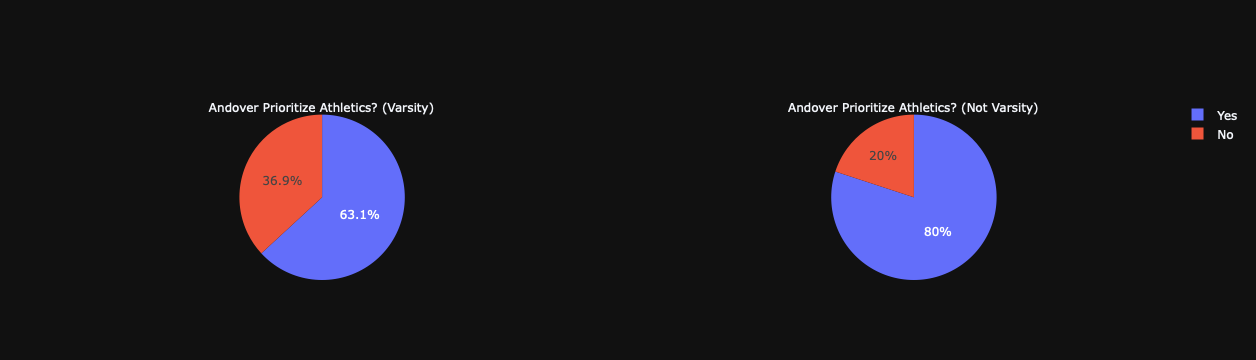

In [107]:
# Do you think that Andover prioritizes/glorifies athletics (compared to music, art, robotics, etc.)?
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])


fig.add_trace(
    go.Pie( 
        values=df_varsity['Do you think that Andover prioritizes/glorifies athletics (compared to music, art, robotics, etc.)?'].value_counts().values, 
        labels=df_varsity['Do you think that Andover prioritizes/glorifies athletics (compared to music, art, robotics, etc.)?'].value_counts().index, 
        title='Andover Prioritize Athletics? (Varsity)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_novarsity['Do you think that Andover prioritizes/glorifies athletics (compared to music, art, robotics, etc.)?'].value_counts().index,
        values=df_novarsity['Do you think that Andover prioritizes/glorifies athletics (compared to music, art, robotics, etc.)?'].value_counts().values,
        title='Andover Prioritize Athletics? (Not Varsity)'
    ),
    row=1, col=2)

# plot(fig)
fig.show()

---
# Campus Diversity

# Faculty lacking in gender diversity and gender identity

In [108]:
find_no(df_facDivGender, df_Nonbinary, "Number of NB people who think faculty gender diversity is not enough")
find_no(df_facDivGender, df_Man, "Number of Men who think faculty gender diversity is not enough")
find_no(df_facDivGender, df_Woman, "Number of Women who think faculty gender diversity is not enough")

Number of NB people who think faculty gender diversity is not enough: 7 out of 17 , percentage : 41.17647058823529 %
Number of Men who think faculty gender diversity is not enough: 45 out of 426 , percentage : 10.56338028169014 %
Number of Women who think faculty gender diversity is not enough: 90 out of 458 , percentage : 19.65065502183406 %


# Faculty lacking in racial diversity vs race

In [109]:
for i in range(len(array_of_races_df)):
    find_no(df_facDivRace, array_of_races_df[i], f"Number of {array_of_races_name[i]} who think faculty racial diversity is not enough")
    print()

Number of df_Asian who think faculty racial diversity is not enough: 140 out of 380 , percentage : 36.84210526315789 %

Number of df_Black who think faculty racial diversity is not enough: 74 out of 110 , percentage : 67.27272727272727 %

Number of df_NHPI who think faculty racial diversity is not enough: 3 out of 12 , percentage : 25.0 %

Number of df_Indigenous who think faculty racial diversity is not enough: 18 out of 26 , percentage : 69.23076923076923 %

Number of df_White who think faculty racial diversity is not enough: 167 out of 543 , percentage : 30.755064456721914 %



# Social divide due to socioeconomic status and perceived socioeconomic class

In [110]:
socialDivide_correlations('What is your perceived socioeconomic status?')

df_socialDivideNo : 49
Upper-middle class    19
Upper class           16
Middle class          11
Lower-middle class     3
Name: What is your perceived socioeconomic status?, dtype: int64

df_socialDivideAbility : 225
Upper-middle class    93
Upper class           66
Middle class          38
Lower class           14
Lower-middle class    14
Name: What is your perceived socioeconomic status?, dtype: int64

df_socialDivideEthnicity : 420
Upper-middle class    172
Upper class           126
Middle class           67
Lower-middle class     33
Lower class            21
Name: What is your perceived socioeconomic status?, dtype: int64

df_socialDivideGender : 372
Upper-middle class    158
Upper class           121
Middle class           49
Lower-middle class     25
Lower class            19
Name: What is your perceived socioeconomic status?, dtype: int64

df_socialDivideNeuroDiv : 200
Upper-middle class    76
Upper class           69
Middle class          32
Lower class           12
Lower-midd

# Social divide due to race and race

In [111]:
for i in range(len(array_of_races_df)):
    find_no(df_socialDivideRace, array_of_races_df[i], f"Number of {array_of_races_name[i]} who think there is social divide due to race")
    print()

Number of df_Asian who think there is social divide due to race: 237 out of 380 , percentage : 62.36842105263158 %

Number of df_Black who think there is social divide due to race: 77 out of 110 , percentage : 70.0 %

Number of df_NHPI who think there is social divide due to race: 6 out of 12 , percentage : 50.0 %

Number of df_Indigenous who think there is social divide due to race: 19 out of 26 , percentage : 73.07692307692307 %

Number of df_White who think there is social divide due to race: 294 out of 543 , percentage : 54.14364640883977 %



# Ability to obtain leadership positions and gender identity

In [112]:
find_no(df_leaderAffectGender, df_Woman, 'Women who think gender affects ability to obtain leadership pos')
find_no(df_leaderAffectGender, df_Man, 'Men who think gender affects ability to obtain leadership pos')
find_no(df_leaderAffectGender, df_Nonbinary, 'NBs who think gender affects ability to obtain leadership pos')

Women who think gender affects ability to obtain leadership pos: 131 out of 458 , percentage : 28.602620087336245 %
Men who think gender affects ability to obtain leadership pos: 80 out of 426 , percentage : 18.779342723004692 %
NBs who think gender affects ability to obtain leadership pos: 6 out of 17 , percentage : 35.294117647058826 %


# Ability to obtain leadership positions and race 


In [113]:
for i in range(len(array_of_races_df)):
    find_no(df_leaderAffectRace, array_of_races_df[i], f"Number of {array_of_races_name[i]} who think race affects ability to obtain leadership pos")
    print()

Number of df_Asian who think race affects ability to obtain leadership pos: 131 out of 380 , percentage : 34.473684210526315 %

Number of df_Black who think race affects ability to obtain leadership pos: 41 out of 110 , percentage : 37.27272727272727 %

Number of df_NHPI who think race affects ability to obtain leadership pos: 0 out of 12 , percentage : 0.0 %

Number of df_Indigenous who think race affects ability to obtain leadership pos: 10 out of 26 , percentage : 38.46153846153847 %

Number of df_White who think race affects ability to obtain leadership pos: 130 out of 543 , percentage : 23.941068139963168 %



# Ability to obtain leadership pos due to socioeconomic status and perceived class 

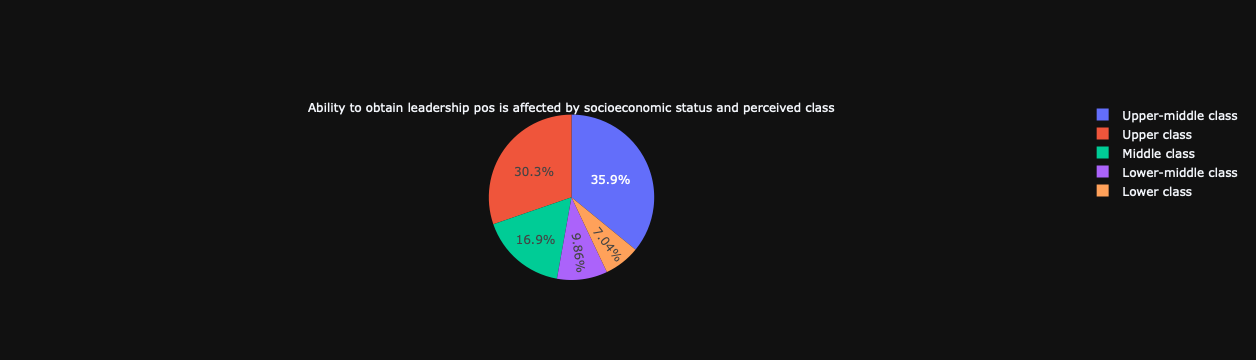

In [114]:
fig = make_subplots(rows=1, cols=1, specs=[[{"type": "pie"}]])


fig.add_trace(
    go.Pie( 
        values=df_leaderAffectSEC['What is your perceived socioeconomic status?'].value_counts().values, 
        labels=df_leaderAffectSEC['What is your perceived socioeconomic status?'].value_counts().index, 
        title='Ability to obtain leadership pos is affected by socioeconomic status and perceived class'
    ), 
     row=1, col=1
)

fig.show()

In [115]:
# df_unsure
# df_0
# df_35
# df_60
# df_100
# df_150
# df_250
# df_500

find_no(df_leaderAffectSEC, df_unsure, "Unsure Income vs ability to gain Leadership Pos IS affected by SEC")
find_no(df_leaderAffectSEC, df_0, "0-34k Income vs ability to gain Leadership Pos IS affected by SEC")
find_no(df_leaderAffectSEC, df_35, "35-59k Income vs ability to gain Leadership Pos IS affected by SEC")
find_no(df_leaderAffectSEC, df_60, "60-99k Income vs ability to gain Leadership Pos IS affected by SEC")
find_no(df_leaderAffectSEC, df_100, "100-149k Income vs ability to gain Leadership Pos IS affected by SEC")
find_no(df_leaderAffectSEC, df_150, "150-249k Income vs ability to gain Leadership Pos IS affected by SEC")
find_no(df_leaderAffectSEC, df_250, "250-499k Income vs ability to gain Leadership Pos IS affected by SEC")
find_no(df_leaderAffectSEC, df_500, "500+k Income vs ability to gain Leadership Pos IS affected by SEC")

Unsure Income vs ability to gain Leadership Pos IS affected by SEC: 19 out of 230 , percentage : 8.26086956521739 %
0-34k Income vs ability to gain Leadership Pos IS affected by SEC: 8 out of 27 , percentage : 29.629629629629626 %
35-59k Income vs ability to gain Leadership Pos IS affected by SEC: 9 out of 32 , percentage : 28.125 %
60-99k Income vs ability to gain Leadership Pos IS affected by SEC: 13 out of 56 , percentage : 23.214285714285715 %
100-149k Income vs ability to gain Leadership Pos IS affected by SEC: 16 out of 79 , percentage : 20.253164556962027 %
150-249k Income vs ability to gain Leadership Pos IS affected by SEC: 13 out of 117 , percentage : 11.11111111111111 %
250-499k Income vs ability to gain Leadership Pos IS affected by SEC: 24 out of 149 , percentage : 16.10738255033557 %
500+k Income vs ability to gain Leadership Pos IS affected by SEC: 40 out of 261 , percentage : 15.32567049808429 %


# Level of comfort in a classroom and race

In [116]:
for i in range(len(array_of_races_df)):
    find_no(df_classComfortRace, array_of_races_df[i], f"Number of {array_of_races_name[i]} who think their race affects their comfort level in classroom")
    print()

Number of df_Asian who think their race affects their comfort level in classroom: 115 out of 380 , percentage : 30.263157894736842 %

Number of df_Black who think their race affects their comfort level in classroom: 77 out of 110 , percentage : 70.0 %

Number of df_NHPI who think their race affects their comfort level in classroom: 2 out of 12 , percentage : 16.666666666666664 %

Number of df_Indigenous who think their race affects their comfort level in classroom: 14 out of 26 , percentage : 53.84615384615385 %

Number of df_White who think their race affects their comfort level in classroom: 83 out of 543 , percentage : 15.285451197053407 %



# Level of comfort in classroom setting and gender identity

In [117]:
find_no(df_classComfortGender, df_Woman, 'Women who think gender affects ability to obtain leadership pos')
find_no(df_classComfortGender, df_Man, 'Men who think gender affects ability to obtain leadership pos')
find_no(df_classComfortGender, df_Nonbinary, 'NBs who think gender affects ability to obtain leadership pos')

Women who think gender affects ability to obtain leadership pos: 160 out of 458 , percentage : 34.93449781659388 %
Men who think gender affects ability to obtain leadership pos: 49 out of 426 , percentage : 11.502347417840376 %
NBs who think gender affects ability to obtain leadership pos: 11 out of 17 , percentage : 64.70588235294117 %


# EBI curriculum effectiveness and class year

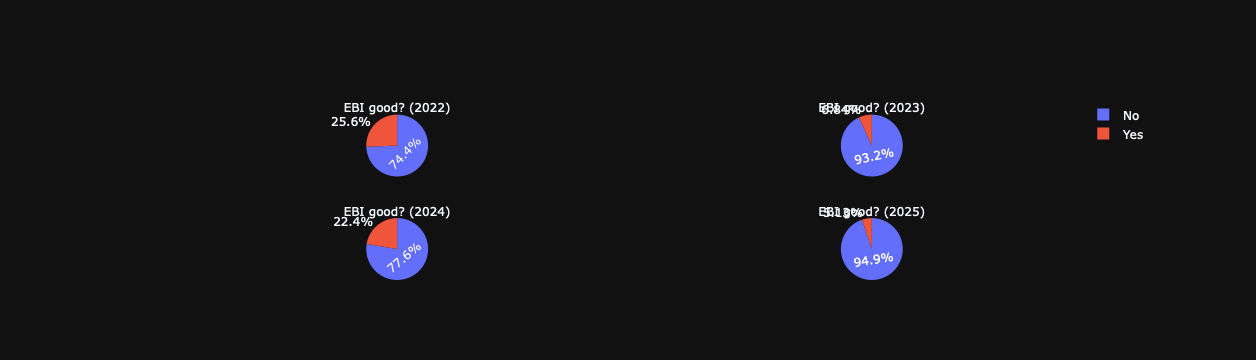

In [118]:
# By class
specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=2, specs=specs)

fig.add_trace(
    go.Pie( 
        values=df_2022['Do you think the EBI curriculum at Andover is effective in helping students become better community members?'].value_counts().values, 
        labels=df_2022['Do you think the EBI curriculum at Andover is effective in helping students become better community members?'].value_counts().index, 
        title='EBI good? (2022)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_2023['Do you think the EBI curriculum at Andover is effective in helping students become better community members?'].value_counts().index,
        values=df_2023['Do you think the EBI curriculum at Andover is effective in helping students become better community members?'].value_counts().values,
        title='EBI good? (2023)'
    ),
    row=1, col=2)

fig.add_trace(
    go.Pie( 
        values=df_2024['Do you think the EBI curriculum at Andover is effective in helping students become better community members?'].value_counts().values, 
        labels=df_2024['Do you think the EBI curriculum at Andover is effective in helping students become better community members?'].value_counts().index, 
        title='EBI good? (2024)'
    ), 
     row=2, col=1)

fig.add_trace(
    go.Pie(
        labels=df_2025['Do you think the EBI curriculum at Andover is effective in helping students become better community members?'].value_counts().index,
        values=df_2025['Do you think the EBI curriculum at Andover is effective in helping students become better community members?'].value_counts().values,
        title='EBI good? (2025)'
    ),
    row=2, col=2)

# plot(fig)

# Day Student integration and student status

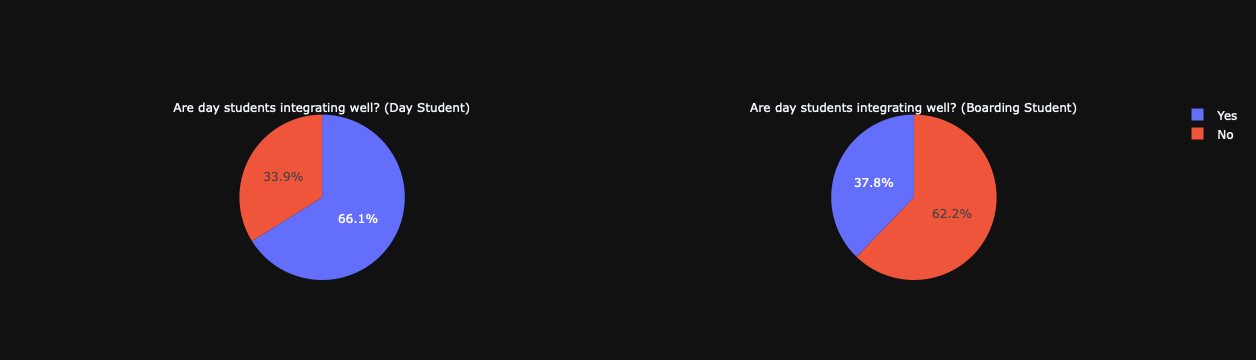

In [119]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie( 
        values=df_day['Do you think day students are able to integrate enough with boarding students at Andover?'].value_counts().values, 
        labels=df_day['Do you think day students are able to integrate enough with boarding students at Andover?'].value_counts().index, 
        title='Are day students integrating well? (Day Student)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_boarding['Do you think day students are able to integrate enough with boarding students at Andover?'].value_counts().index,
        values=df_boarding['Do you think day students are able to integrate enough with boarding students at Andover?'].value_counts().values,
        title='Are day students integrating well? (Boarding Student)'
    ),
    row=1, col=2)

# plot(fig)
fig.show()

---
# Discipline

# DC system effectiveness and DC recipients

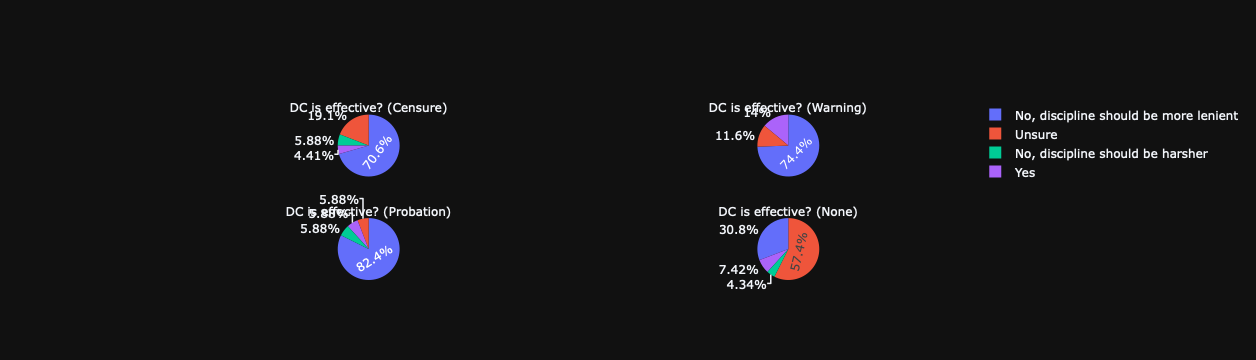

In [120]:
# df_dc_censure
# df_dc_warning
# df_dc_probation
# df_dc_none

# By class
specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=2, specs=specs)

fig.add_trace(
    go.Pie( 
        values=df_dc_censure['Do you think that the DC system effectively disciplines students who are caught breaking school rules?'].value_counts().values, 
        labels=df_dc_censure['Do you think that the DC system effectively disciplines students who are caught breaking school rules?'].value_counts().index, 
        title='DC is effective? (Censure)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_dc_warning['Do you think that the DC system effectively disciplines students who are caught breaking school rules?'].value_counts().index,
        values=df_dc_warning['Do you think that the DC system effectively disciplines students who are caught breaking school rules?'].value_counts().values,
        title='DC is effective? (Warning)'
    ),
    row=1, col=2)

fig.add_trace(
    go.Pie( 
        values=df_dc_probation['Do you think that the DC system effectively disciplines students who are caught breaking school rules?'].value_counts().values, 
        labels=df_dc_probation['Do you think that the DC system effectively disciplines students who are caught breaking school rules?'].value_counts().index, 
        title='DC is effective? (Probation)'
    ), 
     row=2, col=1)

fig.add_trace(
    go.Pie(
        labels=df_dc_none['Do you think that the DC system effectively disciplines students who are caught breaking school rules?'].value_counts().index,
        values=df_dc_none['Do you think that the DC system effectively disciplines students who are caught breaking school rules?'].value_counts().values,
        title='DC is effective? (None)'
    ),
    row=2, col=2)

# plot(fig)

# Major offense and boarding/day status

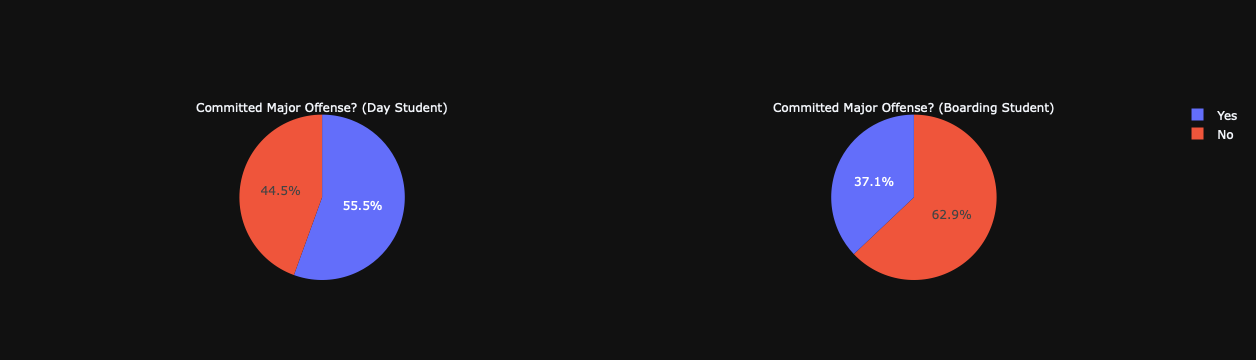

In [121]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie( 
        values=df_day['Have you ever committed a major offense without being caught? (Major offenses include, but are not limited to: academic dishonesty, illegal room visits, leaving campus bounds without permission, drugs and alcohol, cruising, gambling, and downloading/sharing sexually explicit content)'].value_counts().values, 
        labels=df_day['Have you ever committed a major offense without being caught? (Major offenses include, but are not limited to: academic dishonesty, illegal room visits, leaving campus bounds without permission, drugs and alcohol, cruising, gambling, and downloading/sharing sexually explicit content)'].value_counts().index, 
        title='Committed Major Offense? (Day Student)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_boarding['Have you ever committed a major offense without being caught? (Major offenses include, but are not limited to: academic dishonesty, illegal room visits, leaving campus bounds without permission, drugs and alcohol, cruising, gambling, and downloading/sharing sexually explicit content)'].value_counts().index,
        values=df_boarding['Have you ever committed a major offense without being caught? (Major offenses include, but are not limited to: academic dishonesty, illegal room visits, leaving campus bounds without permission, drugs and alcohol, cruising, gambling, and downloading/sharing sexually explicit content)'].value_counts().values,
        title='Committed Major Offense? (Boarding Student)'
    ),
    row=1, col=2)

# plot(fig)
fig.show()

# Cheating and class year

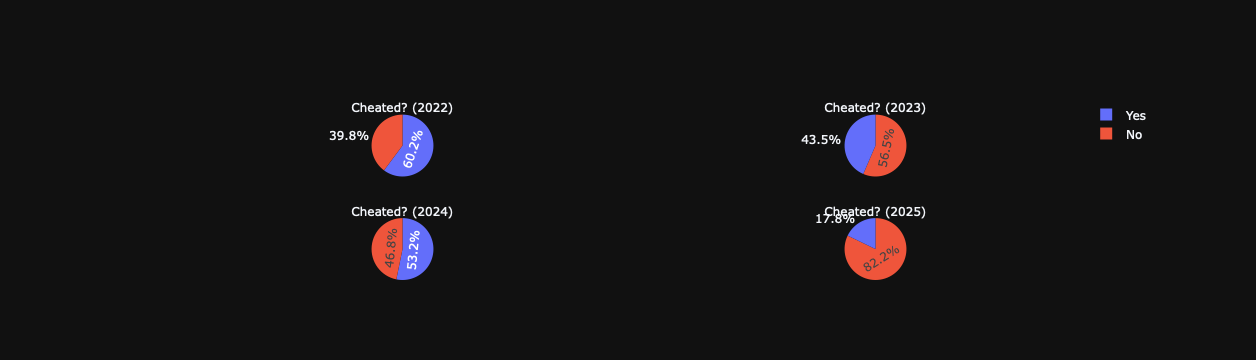

In [122]:
# By class
specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=2, specs=specs)

fig.add_trace(
    go.Pie( 
        values=df_2022['Have you ever cheated on any tests, quizzes, or in-class assessments while at Andover?'].value_counts().values, 
        labels=df_2022['Have you ever cheated on any tests, quizzes, or in-class assessments while at Andover?'].value_counts().index, 
        title='Cheated? (2022)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_2023['Have you ever cheated on any tests, quizzes, or in-class assessments while at Andover?'].value_counts().index,
        values=df_2023['Have you ever cheated on any tests, quizzes, or in-class assessments while at Andover?'].value_counts().values,
        title='Cheated? (2023)'
    ),
    row=1, col=2)

fig.add_trace(
    go.Pie( 
        values=df_2024['Have you ever cheated on any tests, quizzes, or in-class assessments while at Andover?'].value_counts().values, 
        labels=df_2024['Have you ever cheated on any tests, quizzes, or in-class assessments while at Andover?'].value_counts().index, 
        title='Cheated? (2024)'
    ), 
     row=2, col=1)

fig.add_trace(
    go.Pie(
        labels=df_2025['Have you ever cheated on any tests, quizzes, or in-class assessments while at Andover?'].value_counts().index,
        values=df_2025['Have you ever cheated on any tests, quizzes, or in-class assessments while at Andover?'].value_counts().values,
        title='Cheated? (2025)'
    ),
    row=2, col=2)

# plot(fig)

# Boarding vs Day student understanding dc process

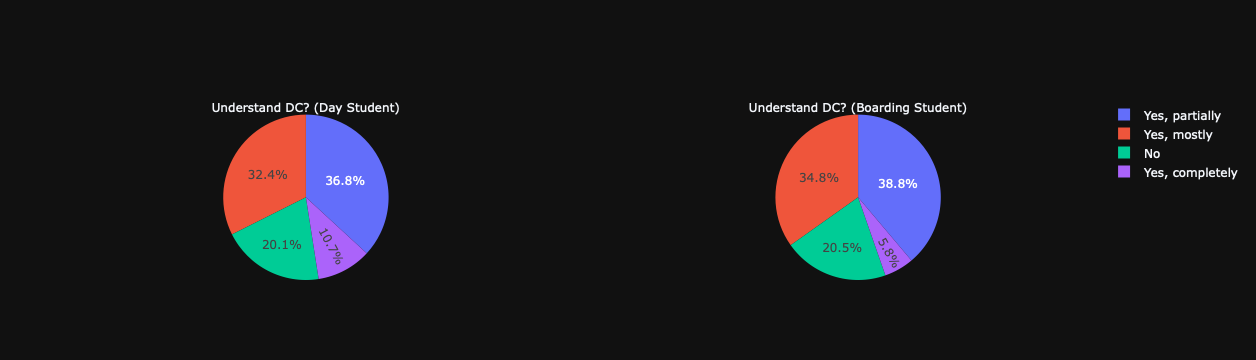

In [123]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie( 
        values=df_day['Do you understand the Community Conduct Council (CCC) and Disciplinary Committee (DC) processes?'].value_counts().values, 
        labels=df_day['Do you understand the Community Conduct Council (CCC) and Disciplinary Committee (DC) processes?'].value_counts().index, 
        title='Understand DC? (Day Student)'
    ), 
     row=1, col=1)

fig.add_trace(
    go.Pie(
        labels=df_boarding['Do you understand the Community Conduct Council (CCC) and Disciplinary Committee (DC) processes?'].value_counts().index,
        values=df_boarding['Do you understand the Community Conduct Council (CCC) and Disciplinary Committee (DC) processes?'].value_counts().values,
        title='Understand DC? (Boarding Student)'
    ),
    row=1, col=2)

# plot(fig)
fig.show()

# DC privilege and family income